# Generative Model Reference Collections

### Status quo label

[.]:copied [-]:on progress [=]:written [%]:completed [@]:memorized  
copied : not wired yet. check path and might contains bug  
on progress : fixing bug or refactoring  
written : checked functional  
completed : refactoring completed and fully functional  
memorized : ready to livecoding  

### todo
[todo1](#todo1) : refactoring

## Contents  

### chapter 1. Introduction

#### Reference
- [NIPS 2016 tutorial Goodfellow](https://channel9.msdn.com/Events/Neural-Information-Processing-Systems-Conference/Neural-Information-Processing-Systems-Conference-NIPS-2016/Generative-Adversarial-Networks)
    - Non-convergence in GANS [1:31:15]  
- slides are taken from NIPS tutorial [Goodfellow](http://www.iangoodfellow.com/slides/2016-12-04-NIPS.pdf)
- [github on most gan implementations](https://github.com/wiseodd/generative-models)
- [slides for gan quick path](https://www.slideshare.net/ssuser77ee21/generative-adversarial-networks-70896091)

### chapter 2. Generative Models
1. [Simple Generative Adversarial Network tensorflow](#GAN) [paper](https://arxiv.org/abs/1406.2661)  
  - [.][[GAN-g code]](#GAN-code-Gaussian): simple Generative Adversarial Network - on Gaussian
  - [@][[GAN code]](#GAN-code): simple Generative Adversarial Network tensorflow on MNIST  
2. [Deep Convolutional Generative Adversarial Network tensorflow](#DCGAN)
  - [.][[DCGAN code]](#DCGAN-code) : Deep Convolutional GAN [paper](https://arxiv.org/abs/1511.06434)  
3. [Super Resolution Generative Adversarial Network tensorflow](#SRGAN)  
  - [.][[SRGAN code]] : Super Resolution CNN, GAN  
4. [UnrolledGAN](#UnrolledGAN) : backpropagate through k updates of the discriminator to prevent mode collapse [paper](https://arxiv.org/abs/1611.02163)
  - [][[UnrolledGAN code]]() [not recommended?]
5. [InfoGAN](#InfoGAN) : Maximizing mutual information btw small subset of laten var. and observations [paper](https://arxiv.org/pdf/1606.03657.pdf)    
  - [.][[InfoGAN code]](#InfoGAN-code)
6. [EBGAN] : Energy Based GAN
7. [ACGAN] : Axuiliary Classifier GAN  
8. [Wasserstein GAN](#WGAN) : change Jensen-Shannon divergence to Wasserstein distance [paper](https://arxiv.org/abs/1701.07875), [dropbox summary](https://paper.dropbox.com/doc/Wasserstein-GAN-GvU0p2V9ThzdwY3BbhoP7)  
  - [.][[WGAN_tf code]](#WGAN_tf)  
  - [.][[WGAN_keras code]](#WGAN_keras)
9. [Boundary seeking GAN](#BGAN):   
  - [][BGAN] 
- [.][[DiscoGAN]](#DiscoGAN_pytorch) [paper](https://arxiv.org/pdf/1703.05192.pdf)

---

[][SGAN] : stacked GAN  
[][[LSGAN]](https://arxiv.org/abs/1611.04076) : Least Square loss function GAN instead of sigmoid  

[Domain Adversarial Neural Network](#DANN)  
  - [.][[DANN code]](#DANN-code)

### chapter 3. RL connections
1. [actor-critic] [paper](https://arxiv.org/abs/1610.01945)
2. inverse reinforcement learning [paper](https://arxiv.org/abs/1611.03852)
3. imitation learning [paper](https://arxiv.org/abs/1606.03476)

#### Reference
- gan : https://github.com/nlintz/TensorFlow-Tutorials  
- dcgan : https://github.com/carpedm20/DCGAN-tensorflow  
- srgan : https://github.com/david-gpu/srez  
- unrolled-gan : https://github.com/poolio/unrolled_gan
- infogan : https://github.com/openai/InfoGAN, https://github.com/GunhoChoi/GAN_simple  
- wgan : https://github.com/tdeboissiere/DeepLearningImplementations/tree/master/WassersteinGAN, https://github.com/shekkizh/WassersteinGAN.tensorflow  

- discogan : https://github.com/carpedm20/DiscoGAN-pytorch
- dann :  https://github.com/sjchoi86/advanced-tensorflow   

In [1]:
DATASET_DIR = './dataset/'
PROJECT_DIR = './projects/GAN_collections/'
SUMMARY_DIR = PROJECT_DIR+'summaries/'
SAVER_DIR = PROJECT_DIR+'models/'
CHECKPOINT_DIR = PROJECT_DIR+'checkpoints/'
RESULT_DIR = PROJECT_DIR+'results/'

# Introduction

## Sample Generation

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

![Taxonomy of GAN](./img/GAN/NIPS01.png)

- Maximum Likelihood

\begin{equation*}
\theta^* = \underset{\theta}{argmax} \mathbf{E}_{x \sim p_{data}} \log P_{model} \left( \mathbf{x} | \boldsymbol\theta \right)
\end{equation*}

Markov chain breakdown with high dimension?

Explicit vs implicity :  
can write down density function $P_{model}$ and do argmax -> Explicit

Tractable vs. Intractable :  
not possible to calculate the jacobian or hessian of the distribution -> intractable

Parametric vs. Non-parametric :  
set model for pdf and get model params from data -> parametric

- Explicit Tractable 

Fully Visible Belief Nets
: disadvantages : Samples Generation is slow.
- WaveNet


\begin{equation*}
y = g \left( x \right) 
\Longrightarrow p_x \left( x \right) 
= p_y \left( g \left( x \right) \right) 
\big| det 
\frac{\partial {g \left( x \right)}}{ \partial x } 
\big|
\end{equation*}



Change of Variables
: disadvantages : 
- Nonlinear ICA : Kernel density estimation ??

---
##### Density Estimation

- kernel function
\begin{align}
\int_{-\infty}^{\infty} du K \left( u \right) = 1
\end{align}

- kerel Density estimation
\begin{align}
\hat{f_{h}} \left( x \right) = \frac{1}{nh} \overset{n}{\underset{i=1}{\sum}} K \left( \frac{x - x_i}{h} \right)
\end{align}
---
- Explicit Intractable  
  - Variational Autoencoder : max lower bound as infoGAN
  - Markov chain
  
- implicit density
  - Generative Stochastic Network

## Minimax game

Think about zero-sum game, such as chess..
Minimax game set an equilibrium point by choosing a strategy for
minimizing opponent's maximum profit.

![minimax1](./img/GAN/minimax01.png)
![minimax2](./img/GAN/minimax02.png)


[youtube](https://www.youtube.com/watch?v=uzsnQ1a9fq0)

Mathematically,
Definition of maxmin and minmax value  

\begin{align}
\underline{v_i} = \underset{a_i}{max} \underset{a_{-i}}{min} v \left( a_i, a_{-i} \right)
\end{align}


\begin{align}
v_i = \underset{a_{i}}{min} \underset{a_{-i}}{max} v \left( a_i, a_{-i} \right)
\end{align}

## GAN architecture

![GAN basic](./img/GAN/NIPS02.png)

#### from https://github.com/hwalsuklee/tensorflow-GAN-1d-gaussian-ex

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

RANGE = 5

#p_d(x)
class DataDistribution(object):
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def sample(self, N):
        samples = np.random.normal(self.mu, self.sigma, N)
        samples.sort()
        return samples

# p_z(z)
class NoiseDistribution(object):
    def __init__(self, range):
        self.range = range

    # equally spaced samples + noise
    def sample(self, N):
        offset = np.random.random(N)*(float(self.range)/N)
        samples = np.linspace(-self.range, self.range, N)+offset
        return samples

# G(z)
def generator(x, n_hidden=32):

    # initializers
    w_init = tf.truncated_normal_initializer(stddev=2)
    b_init = tf.constant_initializer(0.)

    # 1st hidden layer
    w0 = tf.get_variable('w0', [x.get_shape()[1], n_hidden], initializer=w_init)
    b0 = tf.get_variable('b0', [n_hidden], initializer=b_init)
    h0 = tf.nn.relu(tf.matmul(x, w0) + b0)

    # output layer
    w1 = tf.get_variable('w1', [h0.get_shape()[1], 1], initializer=w_init)
    b1 = tf.get_variable('b1', [1], initializer=b_init)
    o = tf.matmul(h0, w1) + b1

    return o

# D(x)
def discriminator(x, n_hidden=32):

    # initializers
    w_init = tf.contrib.layers.variance_scaling_initializer()
    b_init = tf.constant_initializer(0.)

    # 1st hidden layer
    w0 = tf.get_variable('w0', [x.get_shape()[1], n_hidden], initializer=w_init)
    b0 = tf.get_variable('b0', [n_hidden], initializer=b_init)
    h0 = tf.nn.relu(tf.matmul(x, w0) + b0)

    # output layer
    w1 = tf.get_variable('w1', [h0.get_shape()[1], 1], initializer=w_init)
    b1 = tf.get_variable('b1', [1], initializer=b_init)
    o = tf.sigmoid(tf.matmul(h0, w1) + b1)

    return o

# re-used for optimizing all networks
def optimizer(loss, var_list, num_decay_steps = 400, initial_learning_rate=0.03):
    decay = 0.95
    batch = tf.Variable(0)
    learning_rate = tf.train.exponential_decay(
        initial_learning_rate,
        batch,
        num_decay_steps,
        decay,
        staircase=True
    )
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(
        loss,
        global_step=batch,
        var_list=var_list
    )
    return optimizer

# plot decision boundaries (init, pre-trained, trained) and p_data, p_g
class ResultPlot(object):
    def __init__(self, num_points, num_bins, mu, sigma):
        self.num_points = num_points    # number of data points to be evaluated
        self.num_bins = num_bins        # number of bins to get histogram
        
        self.mu = mu                    # mu of p_data
        self.sigma = sigma              # sigma of p_data

        self.xs = np.linspace(-RANGE, RANGE, num_points)    # positions of data
        self.bins = np.linspace(-RANGE, RANGE, num_bins)    # positions of bins

    def show_results(self, db_init, db_pre_trained, db_trained, pd, pg, save_img=True):
        db_x = np.linspace(-RANGE, RANGE, len(db_trained))
        p_x = np.linspace(-RANGE, RANGE, len(pd))
        f, ax = plt.subplots(1)
        ax.plot(db_x, db_init, 'g--', linewidth=2, label='db_init')
        ax.plot(db_x, db_pre_trained, 'c--', linewidth=2, label='db_pre_trained')
        ax.plot(db_x, db_trained, 'g-', linewidth=2, label='db_trained')
        ax.set_ylim(0, max(1, np.max(pd) * 1.1))
        ax.set_xlim(max(self.mu - self.sigma * 3, -RANGE * 0.9), min(self.mu + self.sigma * 3, RANGE * 0.9))
        plt.plot(p_x, pd, 'b-', linewidth=2, label='real data')
        plt.plot(p_x, pg, 'r-', linewidth=2, label='generated data')
        plt.title('1D Generative Adversarial Network: ' + '(mu : %3g,' % self.mu + ' sigma : %3g)' % self.sigma)
        plt.xlabel('Data values')
        plt.ylabel('Probability density')
        plt.legend()
        plt.grid(True)

        if save_img:
            plt.savefig('GAN_1d_gaussian'+'_mu_%g' % self.mu + '_sigma_%g'% self.sigma +'.png')

        plt.show()

def main():
    """ parameters """
    # p_data
    mu = 0
    sigma = 1

    # training
    B = 150                 # batch-size
    LR = 0.03               # learning rate (generator uses half of this)
    TRAIN_ITERS = 3000      # number of iterations

    # network
    n_hidden = 32           # number of hidden layers

    """ build graph """

    # networks : pre-trained discriminator
    with tf.variable_scope('D_pre'):
        pre_input = tf.placeholder(tf.float32, shape=(None, 1))
        pre_labels = tf.placeholder(tf.float32, shape=(None, 1))
        D_pre = discriminator(pre_input, n_hidden)

    # networks : generator
    with tf.variable_scope('Gen'):
        z = tf.placeholder(tf.float32, shape=(None, 1))
        G_z = generator(z, n_hidden)

    # networks : discriminator
    with tf.variable_scope('Disc') as scope:
        x = tf.placeholder(tf.float32, shape=(None, 1))
        D_real = discriminator(x, n_hidden)
        scope.reuse_variables()
        D_fake = discriminator(G_z, n_hidden)

    # loss for each network
    eps = 1e-2  # to prevent log(0) case
    pre_loss = tf.reduce_mean(tf.square(D_pre - pre_labels))
    loss_g = tf.reduce_mean(-tf.log(D_fake+eps))
    loss_d = tf.reduce_mean(-tf.log(D_real + eps) - tf.log(1 - D_fake + eps))

    # trainable variables for each network
    d_pre_params = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='D_pre')
    d_params = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='Disc')
    g_params = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='Gen')

    # optimizer for each network
    pre_opt = optimizer(pre_loss, d_pre_params, 400, LR)
    opt_d = optimizer(loss_d, d_params, 400, LR)
    opt_g = optimizer(loss_g, g_params, 400, LR/2)

    """ training """

    # open session and initialize all variables
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()

    # sources
    p_data = DataDistribution(mu,sigma)
    p_z = NoiseDistribution(RANGE)

    # class for result-plot
    plot = ResultPlot(10000, 20, mu, sigma)

    # plot : initial decision boundary
    db_init = np.zeros((plot.num_points, 1))
    for i in range(plot.num_points // B):
        db_init[B * i:B * (i + 1)] = sess.run(D_real, {x: np.reshape(plot.xs[B * i:B * (i + 1)], (B, 1))})

    # pre-training discriminator
    num_pretrain_steps = 1000
    for step in range(num_pretrain_steps):

        print ('pre-training :  %d/%d' % (step+1, num_pretrain_steps))

        # Object of pre-training is to make decision boundary as similar as pdf of data (i.e. p_data)
        # Since p_data is unknown in real situation, we get histogram and estimate pdf
        N = 1000
        d = p_data.sample(N)
        n_bins = 100
        histc, edges = np.histogram(d, bins=n_bins, density=True)

        # Estimated pdf is used as labels after normalization
        max_histc = np.max(histc)
        min_histc = np.min(histc)
        labels = (histc-min_histc)/(max_histc-min_histc)
        d = edges[1:]

        # Execute one training step
        sess.run([pre_loss, pre_opt],
                 {pre_input: np.reshape(d, (n_bins, 1)), pre_labels: np.reshape(labels, (n_bins, 1))})
    print('pre-training finished!')

    # store pre-trained variables
    weightsD = sess.run(d_pre_params)

    # copy weights from pre-training over to new D network
    tf.global_variables_initializer().run()
    for i, v in enumerate(d_params):
        sess.run(v.assign(weightsD[i]))

    # plot : pre-trained decision boundary
    db_pre_trained = np.zeros((plot.num_points, 1))
    for i in range(plot.num_points // B):
        db_pre_trained[B * i:B * (i + 1)] = sess.run(D_real, {x: np.reshape(plot.xs[B * i:B * (i + 1)], (B, 1))})

    # training-loop
    for step in range(TRAIN_ITERS):

        np.random.seed(np.random.randint(0,TRAIN_ITERS))

        # update discriminator
        x_ = p_data.sample(B)
        z_ = p_z.sample(B)

        loss_d_, _ = sess.run([loss_d, opt_d], {x: np.reshape(x_, (B, 1)), z: np.reshape(z_, (B, 1))})

        # update generator
        z_ = p_z.sample(B)
        loss_g_, _ = sess.run([loss_g, opt_g], {z: np.reshape(z_, (B, 1))})

        if step % 10 == 0:
            print('[%d/%d]: loss_d : %.3f, loss_g : %.3f'%(step, TRAIN_ITERS, loss_d_, loss_g_))

    """ show results """

    # plot : trained decision boundary
    db_trained = np.zeros((plot.num_points, 1))
    for i in range(plot.num_points // B):
        db_trained[B * i:B * (i + 1)] = sess.run(D_real, {x: np.reshape(plot.xs[B * i:B * (i + 1)], (B, 1))})

    # plot : pdf of data distribution
    d = p_data.sample(plot.num_points)
    pd, _ = np.histogram(d, bins=plot.bins, density=True)

    # plot : pdf of generated samples
    zs = np.linspace(-RANGE, RANGE, plot.num_points)
    g = np.zeros((plot.num_points, 1))
    for i in range(plot.num_points // B):
        g[B * i:B * (i + 1)] = sess.run(G_z, {z: np.reshape(zs[B * i:B * (i + 1)], (B, 1))})
    pg, _ = np.histogram(g, bins=plot.bins, density=True)

    # plot results
    plot.show_results(db_init, db_pre_trained, db_trained, pd, pg, save_img=True)
    
    sess.close()

if __name__ == '__main__':
    main()

<a id='GAN'></a>
## Simple Generative Adversarial Network tensorflow

<a id='GAN-code'></a>

Extracting ../dataset/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../dataset/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../dataset/MNIST_data/t10k-labels-idx1-ubyte.gz
iter : 1, g_obj : 0.693362, d_obj : 1.38614
iter : 2, g_obj : 0.718851, d_obj : 1.36143
iter : 3, g_obj : 0.828227, d_obj : 1.28995
iter : 4, g_obj : 0.952575, d_obj : 1.22824
iter : 5, g_obj : 1.11701, d_obj : 1.1541
iter : 6, g_obj : 1.32599, d_obj : 1.08327
iter : 7, g_obj : 1.57135, d_obj : 0.993151
iter : 8, g_obj : 1.85031, d_obj : 0.927922
iter : 9, g_obj : 2.14413, d_obj : 0.851211
iter : 10, g_obj : 2.42445, d_obj : 0.758628
iter : 11, g_obj : 2.69265, d_obj : 0.685184
iter : 12, g_obj : 2.93074, d_obj : 0.585851
iter : 13, g_obj : 3.14051, d_obj : 0.50473
iter : 14, g_obj : 3.27912, d_obj : 0.445288
iter : 15, g_obj : 3.40379, d_obj : 0.368918
iter : 16, g_obj : 3.47266, d_obj : 0.321504
iter : 17, g_obj : 3.53848, d_obj : 0.267286
iter : 18,

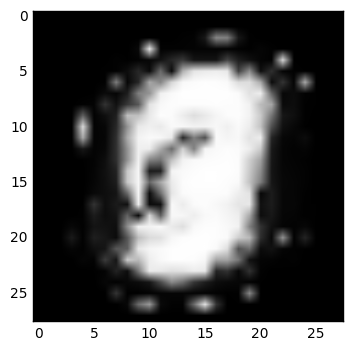

In [2]:
def GAN():
    mnistn = input_data.read_data_sets('./dataset/MNIST_data')
    images = mnistn.train.images

    # HYPER PARAMS
    learning_rate = 0.001
    batch_size = 128


    # PARAMS
    x_size = 784
    d_w1_size = 400
    d_out_size = 1

    z_size = 100
    g_w1_size = 400
    g_out_size = 784

    x = tf.placeholder(tf.float32, [None, x_size])
    z = tf.placeholder(tf.float32, [None, z_size])

    def xavier_initializer(shape):
        return tf.random_normal(shape=shape, stddev=1/shape[0])

    g_weights = {
        'w1': tf.Variable(xavier_initializer([z_size, g_w1_size])),
        'b1': tf.Variable(tf.zeros([g_w1_size])),
        'wout': tf.Variable(xavier_initializer([g_w1_size, g_out_size])),
        'bout': tf.Variable(tf.zeros([g_out_size])),
    }
    d_weights = {
        'w1': tf.Variable(xavier_initializer([x_size, d_w1_size])),
        'b1': tf.Variable(tf.zeros([d_w1_size])),
        'wout': tf.Variable(xavier_initializer([d_w1_size, d_out_size])),
        'bout': tf.Variable(tf.zeros([d_out_size])),
    }

    def generate_z(batchsize):
        return np.random.normal(size=(batchsize, z_size))

    # COST
    def G(z, w=g_weights):
        h1 = tf.nn.relu(tf.matmul(z, w['w1']) + w['b1'])
        return tf.nn.sigmoid(tf.matmul(h1, w['wout']) + w['bout'])

    def D(x, w=d_weights):
        h1 = tf.nn.relu(tf.matmul(x, w['w1']) + w['b1'])
        return tf.nn.sigmoid(tf.matmul(h1, w['wout']) + w['bout'])

    G_Objective = -tf.reduce_mean(tf.log(D(G(z))))
    D_Objective = -tf.reduce_mean(tf.log(D(x)) + tf.log(1 - D(G(z))))


    # OPTIMIZER
    G_opt = tf.train.AdamOptimizer(learning_rate).minimize(G_Objective, var_list=g_weights.values())
    D_opt = tf.train.AdamOptimizer(learning_rate).minimize(D_Objective, var_list=d_weights.values())

    sample = G(z)

    # SESSION
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        iteration=1
        while iteration * batch_size < len(images):
            g_obj, _ = sess.run([G_Objective, G_opt], feed_dict={z: generate_z(batch_size)})
            d_obj, _ = sess.run([D_Objective, D_opt], feed_dict={z: generate_z(batch_size), x: images[np.random.choice(range(len(images)), batch_size)].reshape(batch_size, x_size)})

            print("iter : " + str(iteration) + ", g_obj : " + str(g_obj) + ", d_obj : " + str(d_obj))
            iteration+=1
            if g_obj < 1E-03:
                break;

        image = sess.run(sample, feed_dict={z: generate_z(1)})
        plt.imshow(image.reshape(28, 28), cmap='gray')
        plt.show()
GAN()

<a id='todo1'></a>
#### TODO: refactoring to class

Extracting ./dataset/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./dataset/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./dataset/MNIST_data/t10k-labels-idx1-ubyte.gz
iteration_nums :  1100
('g_cost : ', 0.69324374)('iter : ', 0)('d_cost : ', 1.3862708)

('g_cost : ', 2.8159995)('iter : ', 50)('d_cost : ', 0.69979554)

('g_cost : ', 2.4665189)('iter : ', 100)('d_cost : ', 1.0255251)

('g_cost : ', 3.4756298)('iter : ', 150)('d_cost : ', 0.64613932)

('g_cost : ', 4.7999315)('iter : ', 200)('d_cost : ', 0.082288191)

('g_cost : ', 5.0459547)('iter : ', 250)('d_cost : ', 0.086523265)

('g_cost : ', 3.1910882)('iter : ', 300)('d_cost : ', 0.44913083)

('g_cost : ', 1.3775961)('iter : ', 350)('d_cost : ', 1.8176014)

('g_cost : ', 3.0273714)('iter : ', 400)('d_cost : ', 0.22958979)

('g_cost : ', 2.1049151)('iter : ', 450)('d_cost : ', 0.73471296)

('g_cost : ', 2.8545499)('iter : ', 500)('d_cost : ', 0.58642972)

('g_cost 

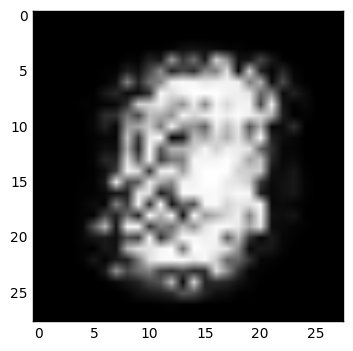

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data


mnistn = input_data.read_data_sets(DATASET_DIR+'MNIST_data')

train_images = mnistn.train.images


# HYPER PARAMS
x_size = 784
d_w1_size = 400
d_wout_size = 1

z_size = 100
g_w1_size = 400
g_wout_size = x_size

nb_class = 10


# PARAMS
x = tf.placeholder(tf.float32, [None, x_size])
z = tf.placeholder(tf.float32, [None, z_size])

def xavier_initializer(shape):
    return tf.random_normal(shape=shape, stddev=1/shape[0])

d_weights = {
    'w1': tf.Variable(xavier_initializer([x_size, d_w1_size])),
    'b1': tf.Variable(tf.zeros([d_w1_size])),
    'wout': tf.Variable(xavier_initializer([d_w1_size, d_wout_size])),
    'bout': tf.Variable(tf.zeros([d_wout_size])),
}

g_weights = {
    'w1': tf.Variable(xavier_initializer([z_size, g_w1_size])),
    'b1': tf.Variable(tf.zeros([g_w1_size])),
    'wout': tf.Variable(xavier_initializer([g_w1_size, g_wout_size])),
    'bout': tf.Variable(tf.zeros([g_wout_size])),
}



# OBJECTIVE, COST
def G(z, w=g_weights):
    h1 = tf.nn.relu(tf.matmul(z, w['w1']) + w['b1'])
    return tf.nn.sigmoid(tf.matmul(h1, w['wout']) + w['bout'])

def D(x, w=d_weights):
    h1 = tf.nn.relu(tf.matmul(x, w['w1']) + w['b1'])
    return tf.nn.sigmoid(tf.matmul(h1, w['wout']) + w['bout'])

def generate_z(batchsize):
    return np.random.normal(size=(batchsize, z_size))


sampler = G(z)

G_cost = -tf.reduce_mean(tf.log(D(G(z))))
D_cost = -tf.reduce_mean(tf.log(D(x)) + tf.log(1-D(G(z))))

G_optm = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(G_cost, var_list=g_weights.values())
D_optm = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(D_cost, var_list=d_weights.values())


# TRAINER
config = tf.ConfigProto()
sess = tf.Session(config=config)
summary = tf.summary.FileWriter(SUMMARY_DIR + "/gan_simple/")

epoch_nums = 1
batch_size = 50

display_num = 10
iter_display_num = 50

def print_display(step, display_num, dicts):
    display_str = ''
    delim = ' , '
    edelim = '\n'
    if step % display_num == 0:
        for item in dicts.items():
            display_str += str(item)#str(it) + delim + str(dicts[it])
        display_str += edelim
        print(display_str)


def timer():
    return None

def memCal():
    return None

init = tf.global_variables_initializer()
for epoch in range(epoch_nums):
    sess.run(init)
    iteration_nums = len(train_images)//batch_size
    print("iteration_nums : ", iteration_nums)
    for it in range(iteration_nums):
        g_cost, g_optm = sess.run([G_cost, G_optm], feed_dict={z: generate_z(batch_size)})
        d_cost, d_optm = sess.run([D_cost, D_optm], feed_dict={z: generate_z(batch_size), x: train_images[np.random.choice(range(len(train_images)), batch_size)]})
        print_display(it, iter_display_num, {'iter : ': it, 'g_cost : ': g_cost, 'd_cost : ': d_cost})

    image = sess.run(sampler, feed_dict={z: generate_z(1)})

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.show()

### Mode Collapse

https://www.quora.com/Whats-kind-of-generative-result-means-mode-collapse-in-Generative-adversarial-networks

Mode collapse is s problem that occurs when the generator learns to map several different input z values to the same output point.

In practice, gradient descent is done in both max and min - imization.



<a id='DCGAN'></a>
## Deep Convolutional Generative Adversarial Network tensorflow

Most deconvs are batch normalized.
Pooling layer : No inverse of pooling.

use conv or avg pooling instead Maxpooling  
use LeakyReLU  
use batch norm both G and D  
use Adam  

![DCGAN](./img/GAN/NIPS03.png)

<a id='DCGAN-code'></a>
#### from https://github.com/carpedm20/DCGAN-tensorflow

sample_labels: [7 5 1 0 3 2 5 2 6 8 3 6 4 0 8 3 2 8 6 2 1 2 0 1 4 4 0 2 4 4 2 3 2 2 8 9 4
 0 0 3 2 0 6 5 3 0 5 2 0 3 7 9 6 1 2 3 9 5 5 3 3 7 0 8]
Epoch: [ 0/  5] [  99/1093] time: 10.9587, d_loss: 1.39676785, g_loss: 0.68027508
Epoch: [ 0/  5] [ 199/1093] time: 18.6230, d_loss: 1.40808439, g_loss: 0.67829353
Epoch: [ 0/  5] [ 299/1093] time: 26.2620, d_loss: 1.39788926, g_loss: 0.68885237
Epoch: [ 0/  5] [ 399/1093] time: 33.8923, d_loss: 1.39981425, g_loss: 0.67746365
Epoch: [ 0/  5] [ 499/1093] time: 41.5065, d_loss: 1.40948737, g_loss: 0.66996813
Epoch: [ 0/  5] [ 599/1093] time: 49.1120, d_loss: 1.41138911, g_loss: 0.67574185
Epoch: [ 0/  5] [ 699/1093] time: 56.7160, d_loss: 1.38485897, g_loss: 0.67479324
Epoch: [ 0/  5] [ 799/1093] time: 64.3182, d_loss: 1.39746499, g_loss: 0.66976869
Epoch: [ 0/  5] [ 899/1093] time: 71.9103, d_loss: 1.38356161, g_loss: 0.67734891
Epoch: [ 0/  5] [ 999/1093] time: 79.5430, d_loss: 1.38627589, g_loss: 0.67373639


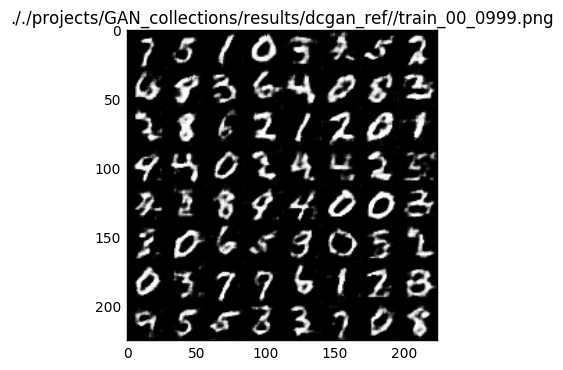

[Sample] d_loss: 1.37645912, g_loss: 0.70127809
Epoch: [ 1/  5] [   6/1093] time: 88.7360, d_loss: 1.39450657, g_loss: 0.67442518
Epoch: [ 1/  5] [ 106/1093] time: 96.3304, d_loss: 1.39040303, g_loss: 0.67431557
Epoch: [ 1/  5] [ 206/1093] time: 103.9156, d_loss: 1.39206302, g_loss: 0.67060095
Epoch: [ 1/  5] [ 306/1093] time: 111.4941, d_loss: 1.39074302, g_loss: 0.67126739
Epoch: [ 1/  5] [ 406/1093] time: 119.0663, d_loss: 1.38645029, g_loss: 0.67541885
Epoch: [ 1/  5] [ 506/1093] time: 126.6498, d_loss: 1.40509415, g_loss: 0.66600615
Epoch: [ 1/  5] [ 606/1093] time: 134.2048, d_loss: 1.38572598, g_loss: 0.67600095
Epoch: [ 1/  5] [ 706/1093] time: 141.7660, d_loss: 1.38983178, g_loss: 0.67183697
Epoch: [ 1/  5] [ 806/1093] time: 149.3123, d_loss: 1.38656807, g_loss: 0.67537946
Epoch: [ 1/  5] [ 906/1093] time: 156.8637, d_loss: 1.39385557, g_loss: 0.67634892


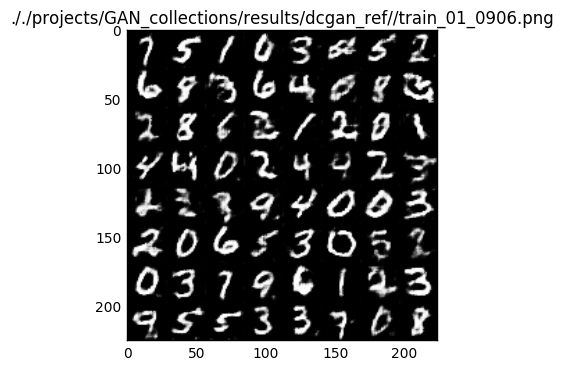

[Sample] d_loss: 1.38069510, g_loss: 0.69643819
Epoch: [ 1/  5] [1006/1093] time: 165.8700, d_loss: 1.38558078, g_loss: 0.67900807
Epoch: [ 2/  5] [  13/1093] time: 173.4075, d_loss: 1.40423560, g_loss: 0.66963828
Epoch: [ 2/  5] [ 113/1093] time: 180.9521, d_loss: 1.39360023, g_loss: 0.66815329
Epoch: [ 2/  5] [ 213/1093] time: 188.4894, d_loss: 1.38908768, g_loss: 0.68519652
Epoch: [ 2/  5] [ 313/1093] time: 196.0165, d_loss: 1.39893270, g_loss: 0.67375660
Epoch: [ 2/  5] [ 413/1093] time: 203.5512, d_loss: 1.38994837, g_loss: 0.68062991
Epoch: [ 2/  5] [ 513/1093] time: 211.0909, d_loss: 1.38960457, g_loss: 0.67204136
Epoch: [ 2/  5] [ 613/1093] time: 218.6153, d_loss: 1.38253689, g_loss: 0.68404400
Epoch: [ 2/  5] [ 713/1093] time: 226.1378, d_loss: 1.39237022, g_loss: 0.67518675
Epoch: [ 2/  5] [ 813/1093] time: 233.6539, d_loss: 1.38713789, g_loss: 0.68277389


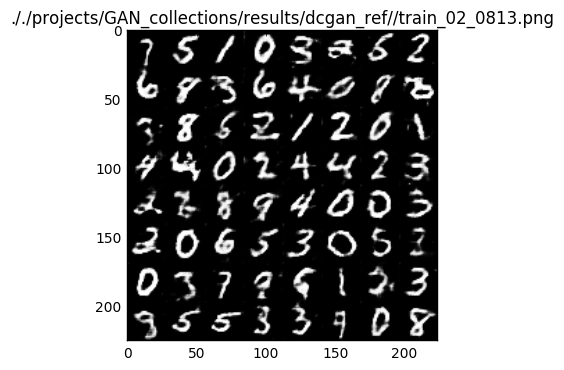

[Sample] d_loss: 1.36804485, g_loss: 0.70974123
Epoch: [ 2/  5] [ 913/1093] time: 242.8914, d_loss: 1.38692713, g_loss: 0.67225313
Epoch: [ 2/  5] [1013/1093] time: 250.4104, d_loss: 1.38276553, g_loss: 0.67971665
Epoch: [ 3/  5] [  20/1093] time: 257.9224, d_loss: 1.39292765, g_loss: 0.67306244
Epoch: [ 3/  5] [ 120/1093] time: 265.4325, d_loss: 1.39068258, g_loss: 0.68194163
Epoch: [ 3/  5] [ 220/1093] time: 272.9437, d_loss: 1.39634657, g_loss: 0.67080396
Epoch: [ 3/  5] [ 320/1093] time: 280.4658, d_loss: 1.39095163, g_loss: 0.67375147
Epoch: [ 3/  5] [ 420/1093] time: 287.9708, d_loss: 1.38390064, g_loss: 0.67417407
Epoch: [ 3/  5] [ 520/1093] time: 295.4799, d_loss: 1.38652384, g_loss: 0.67394018
Epoch: [ 3/  5] [ 620/1093] time: 302.9838, d_loss: 1.38630402, g_loss: 0.67897511
Epoch: [ 3/  5] [ 720/1093] time: 310.4805, d_loss: 1.38797474, g_loss: 0.67403376


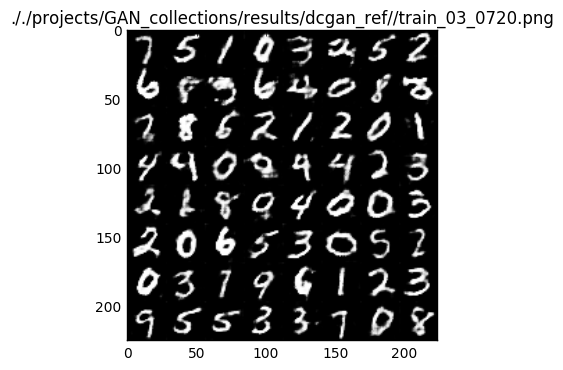

[Sample] d_loss: 1.37742901, g_loss: 0.69571435
Epoch: [ 3/  5] [ 820/1093] time: 319.6159, d_loss: 1.38367260, g_loss: 0.67805171
Epoch: [ 3/  5] [ 920/1093] time: 327.1633, d_loss: 1.38086808, g_loss: 0.69188261
Epoch: [ 3/  5] [1020/1093] time: 334.6729, d_loss: 1.38316643, g_loss: 0.68947202
Epoch: [ 4/  5] [  27/1093] time: 342.1722, d_loss: 1.39581108, g_loss: 0.67297852
Epoch: [ 4/  5] [ 127/1093] time: 349.6629, d_loss: 1.38742399, g_loss: 0.67962551
Epoch: [ 4/  5] [ 227/1093] time: 357.1572, d_loss: 1.37681222, g_loss: 0.68571436
Epoch: [ 4/  5] [ 327/1093] time: 364.6691, d_loss: 1.39575589, g_loss: 0.67488784
Epoch: [ 4/  5] [ 427/1093] time: 372.1547, d_loss: 1.38197422, g_loss: 0.68199337
Epoch: [ 4/  5] [ 527/1093] time: 379.6313, d_loss: 1.39318299, g_loss: 0.67585933
Epoch: [ 4/  5] [ 627/1093] time: 387.1030, d_loss: 1.39511025, g_loss: 0.67673892


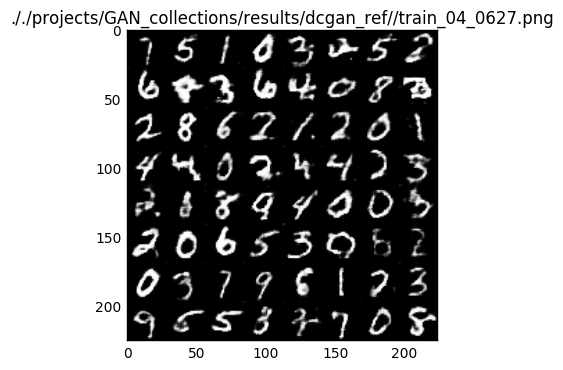

[Sample] d_loss: 1.38971806, g_loss: 0.69331872
Epoch: [ 4/  5] [ 727/1093] time: 396.1397, d_loss: 1.38865113, g_loss: 0.68232417
Epoch: [ 4/  5] [ 827/1093] time: 403.8945, d_loss: 1.39177585, g_loss: 0.67249185
Epoch: [ 4/  5] [ 927/1093] time: 411.3826, d_loss: 1.39145803, g_loss: 0.68078727
Epoch: [ 4/  5] [1027/1093] time: 418.8593, d_loss: 1.39410520, g_loss: 0.67970550
y: [5 0 4 9 3 7 4 5 5 5 8 5 5 5 2 2 6 4 8 9 1 7 6 1 6 5 9 4 8 4 3 5 0 3 3 2 6
 4 0 7 2 3 8 4 0 0 9 8 9 4 6 0 8 9 7 9 8 1 7 9 8 3 4 6]


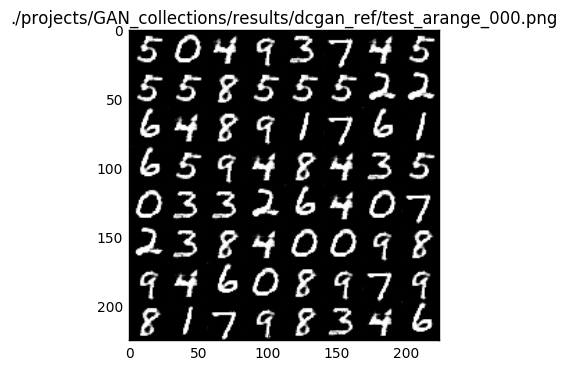

 [  0/ 10] savename: ./projects/GAN_collections/results/dcgan_ref/test_arange_000.png
y: [1 6 9 3 1 1 2 6 5 8 6 9 1 6 4 3 5 0 1 8 2 8 0 6 9 4 0 7 5 0 6 6 6 1 3 4 6
 8 6 3 1 7 3 7 9 1 7 7 0 7 5 4 0 9 6 4 0 8 7 3 7 2 6 7]


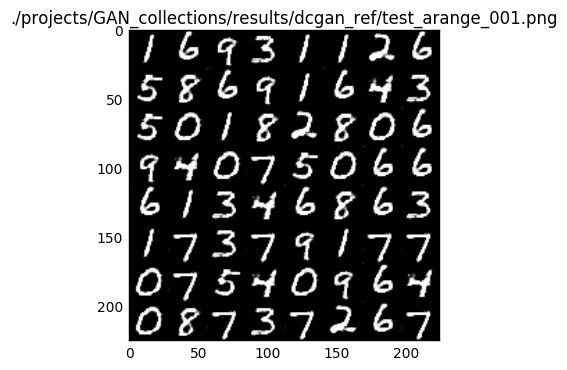

 [  1/ 10] savename: ./projects/GAN_collections/results/dcgan_ref/test_arange_001.png
y: [3 2 8 1 0 5 5 5 7 0 6 3 1 5 0 5 1 5 7 7 6 3 5 2 4 5 8 2 0 0 2 9 7 4 1 5 6
 3 6 1 7 8 4 3 1 6 4 5 3 3 9 8 0 3 9 3 6 9 9 5 5 6 7 3]


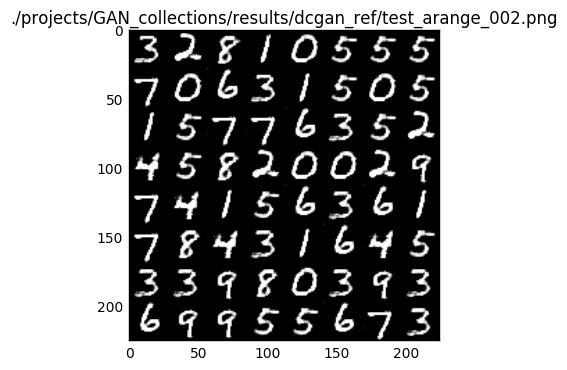

 [  2/ 10] savename: ./projects/GAN_collections/results/dcgan_ref/test_arange_002.png
y: [1 4 3 3 3 6 3 4 0 4 3 6 1 2 0 7 3 3 0 7 3 3 0 1 0 4 2 0 3 5 0 2 6 0 2 3 4
 5 6 3 6 0 4 5 0 8 4 3 3 2 0 1 9 0 0 2 7 7 3 4 8 8 7 0]


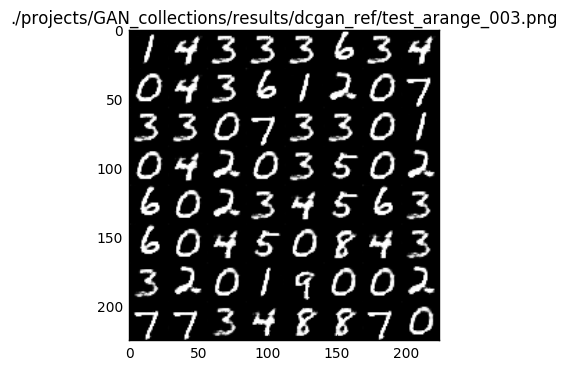

 [  3/ 10] savename: ./projects/GAN_collections/results/dcgan_ref/test_arange_003.png
y: [3 7 0 5 0 1 6 8 4 7 1 0 6 2 4 7 9 8 1 9 3 2 0 3 2 1 5 1 5 4 5 0 6 8 4 5 8
 1 7 9 3 8 1 5 9 8 6 9 5 3 9 6 3 1 0 7 7 9 7 2 5 3 3 1]


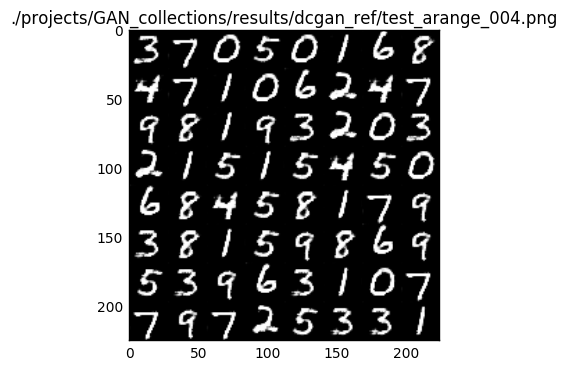

 [  4/ 10] savename: ./projects/GAN_collections/results/dcgan_ref/test_arange_004.png
y: [4 8 1 5 2 7 6 6 5 9 3 4 0 5 3 5 0 0 2 2 8 1 5 2 0 0 4 3 7 0 4 8 0 6 2 0 2
 5 0 7 4 1 6 9 8 1 7 0 0 4 3 1 7 1 4 7 6 9 1 5 5 0 3 7]


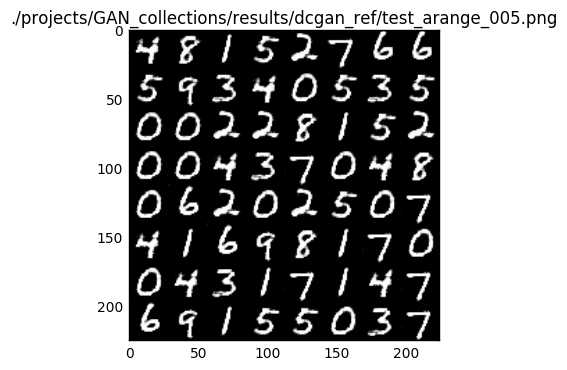

 [  5/ 10] savename: ./projects/GAN_collections/results/dcgan_ref/test_arange_005.png
y: [2 5 4 7 5 9 1 9 6 5 4 4 7 4 9 4 3 4 5 2 3 6 5 8 6 5 9 8 3 6 0 8 9 9 6 0 3
 4 4 6 4 8 7 9 7 8 9 2 9 5 2 6 3 7 8 1 0 4 2 3 0 3 4 8]


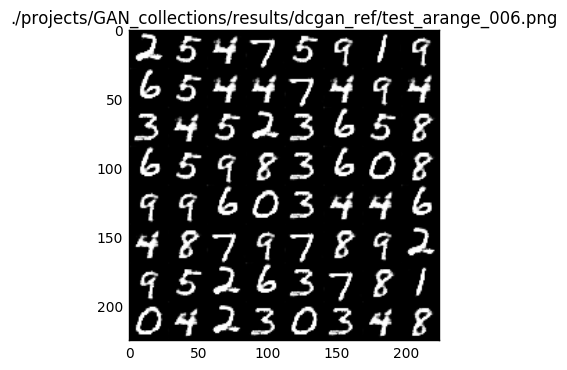

 [  6/ 10] savename: ./projects/GAN_collections/results/dcgan_ref/test_arange_006.png
y: [6 6 7 4 0 5 4 7 6 9 3 3 2 2 2 8 3 8 0 2 5 4 6 1 6 7 2 0 1 2 2 1 5 3 2 8 1
 8 4 8 8 9 2 0 9 1 7 9 1 2 2 7 7 9 5 9 6 8 0 6 3 5 4 0]


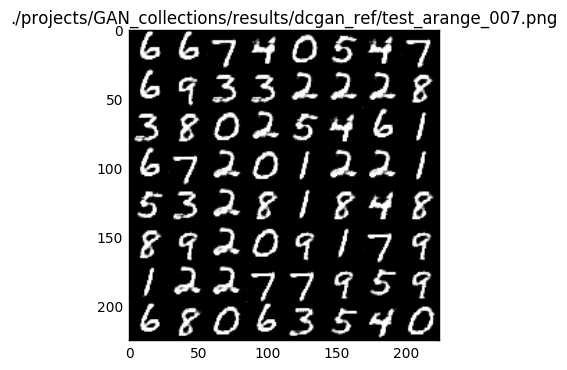

 [  7/ 10] savename: ./projects/GAN_collections/results/dcgan_ref/test_arange_007.png
y: [9 9 4 0 7 1 8 2 1 8 7 5 2 9 3 4 4 7 3 3 0 9 3 8 3 8 9 9 8 0 6 9 5 0 1 1 6
 4 2 0 2 6 9 4 9 9 9 7 1 5 8 5 8 5 7 4 8 5 4 0 6 8 9 2]


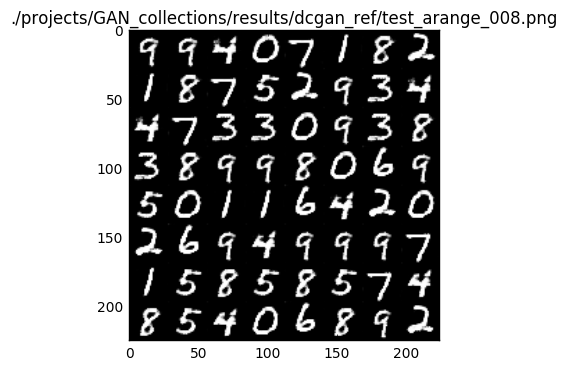

 [  8/ 10] savename: ./projects/GAN_collections/results/dcgan_ref/test_arange_008.png
y: [1 0 2 7 3 3 5 5 9 9 2 7 8 6 1 1 7 9 2 8 2 2 3 9 5 1 8 1 0 3 7 0 0 2 3 8 7
 7 2 0 8 0 4 7 1 7 5 1 7 9 4 6 0 8 5 2 5 9 2 4 4 2 3 9]


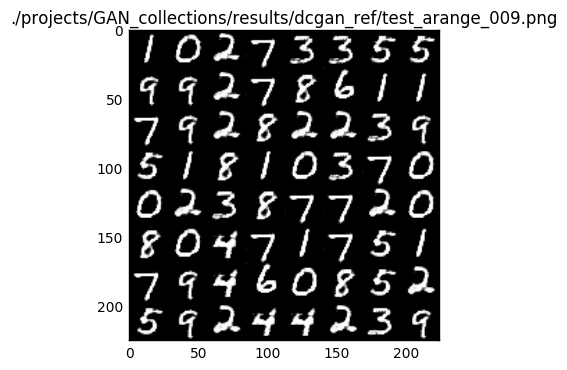

 [  9/ 10] savename: ./projects/GAN_collections/results/dcgan_ref/test_arange_009.png


In [2]:
import os
import time
import argparse
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.misc 
from scipy.misc import imread, imresize
from tensorflow.examples.tutorials.mnist import input_data


# RESET EXISTING FLAG 
tf.app.flags.FLAGS = tf.python.platform.flags._FlagValues()
tf.app.flags._global_parser = argparse.ArgumentParser()
# SET FLAG
flags = tf.app.flags
flags.DEFINE_integer("epoch", 5, "Epoch to train [5]")
flags.DEFINE_float("learning_rate", 0.0002, "Learning rate of for adam [0.0002]")
flags.DEFINE_float("beta1", 0.5, "Momentum term of adam [0.5]")
flags.DEFINE_integer("train_size", np.inf, "The size of train images [np.inf]")
flags.DEFINE_integer("batch_size", 64, "The size of batch images [64]")
flags.DEFINE_integer("image_size", 108, "The size of image to use (will be center cropped) [108]")
flags.DEFINE_integer("output_size", 64, "The size of the output images to produce [64]")
flags.DEFINE_integer("c_dim", 3, "Dimension of image color. [3]")
flags.DEFINE_string("dataset", "mnist", "The name of dataset [celebA, mnist, lsun]")
flags.DEFINE_string("checkpoint_dir", CHECKPOINT_DIR+'dcgan_ref/', "Directory name to save the checkpoints [checkpoint]")
flags.DEFINE_string("sample_dir", RESULT_DIR+"dcgan_ref/", "Directory name to save the image samples [samples]")
flags.DEFINE_boolean("is_crop", False, "True for training, False for testing [False]")
flags.DEFINE_boolean("visualize", False, "True for visualizing, False for nothing [False]")

# DO TRAIN OR NOT
flags.DEFINE_boolean("is_train", True, "True for training, False for testing [False]")

FLAGS = flags.FLAGS




def load_mnist():
    data_dir = DATASET_DIR+"MNIST_data/"
    fd = open(os.path.join(data_dir,'train-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    trX = loaded[16:].reshape((60000,28,28,1)).astype(np.float)
    fd = open(os.path.join(data_dir,'train-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    trY = loaded[8:].reshape((60000)).astype(np.float)
    fd = open(os.path.join(data_dir,'t10k-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    teX = loaded[16:].reshape((10000,28,28,1)).astype(np.float)
    fd = open(os.path.join(data_dir,'t10k-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    teY = loaded[8:].reshape((10000)).astype(np.float)
    trY = np.asarray(trY)
    teY = np.asarray(teY)
    X = np.concatenate((trX, teX), axis=0)
    y = np.concatenate((trY, teY), axis=0)
    # SHUFFLE 
    seed = 547
    np.random.seed(seed)
    np.random.shuffle(X)
    np.random.seed(seed)
    np.random.shuffle(y)
    y_vec = np.zeros((len(y), 10), dtype=np.float)
    for i, label in enumerate(y):
        y_vec[i, int(y[i])] = 1.0
    return X/255., y_vec


if 0:
    image_summary = tf.image_summary
    scalar_summary = tf.scalar_summary
    histogram_summary = tf.histogram_summary
    merge_summary = tf.merge_summary
    SummaryWriter = tf.train.SummaryWriter
else:
    image_summary = tf.summary.image
    scalar_summary = tf.summary.scalar
    histogram_summary = tf.summary.histogram
    merge_summary = tf.summary.merge
    SummaryWriter = tf.summary.FileWriter



def lrelu(x, leak=0.2, name="lrelu"):
    return tf.maximum(x, leak*x)# mem double : check stackoverflow


class batch_norm(object):
    def __init__(self, epsilon=1e-5, momentum = 0.9, name="batch_norm"):
        with tf.variable_scope(name):
            self.epsilon  = epsilon
            self.momentum = momentum
            self.name = name
    def __call__(self, x, train=True):
        return tf.contrib.layers.batch_norm(x,
                                            decay=self.momentum, 
                                            updates_collections=None,
                                            epsilon=self.epsilon,
                                            scale=True,
                                            is_training=train,
                                            scope=self.name)



def linear(input_, output_size, scope=None, stddev=0.02, init_bias=0.0, with_w=False):
    shape = input_.get_shape().as_list()

    with tf.variable_scope(scope or "Linear"):
        matrix = tf.get_variable("Matrix", [shape[1], output_size], tf.float32,
                                 tf.random_normal_initializer(stddev=stddev))
        bias = tf.get_variable("bias", [output_size], 
            initializer=tf.constant_initializer(init_bias))
        if with_w:
            return tf.matmul(input_, matrix) + bias, matrix, bias
        else:
            return tf.matmul(input_, matrix) + bias


def conv_cond_concat(x, y):
    x_shapes = x.get_shape()
    y_shapes = y.get_shape()
    return tf.concat(3, [x, y*tf.ones([x_shapes[0], x_shapes[1], x_shapes[2], y_shapes[3]])])


def conv2d(input_, output_dim, 
           k_h=5, k_w=5, d_h=2, d_w=2, stddev=0.02,
           name="conv2d"):
    with tf.variable_scope(name):
        w = tf.get_variable('w', [k_h, k_w, input_.get_shape()[-1], output_dim],
                            initializer=tf.truncated_normal_initializer(stddev=stddev))
        conv = tf.nn.conv2d(input_, w, strides=[1, d_h, d_w, 1], padding='SAME')
        biases = tf.get_variable('biases', [output_dim], initializer=tf.constant_initializer(0.0))
        conv = tf.reshape(tf.nn.bias_add(conv, biases), conv.get_shape())
        return conv


def deconv2d(input_, output_shape,
             k_h=5, k_w=5, d_h=2, d_w=2, stddev=0.02,
             name="deconv2d", with_w=False):
    with tf.variable_scope(name):
        # filter : [height, width, output_channels, in_channels]
        w = tf.get_variable('w', [k_h, k_w, output_shape[-1], input_.get_shape()[-1]],
                            initializer=tf.random_normal_initializer(stddev=stddev))
        try:
            deconv = tf.nn.conv2d_transpose(input_, w, output_shape=output_shape,
                                strides=[1, d_h, d_w, 1])
        # Support for verisons of TensorFlow before 0.7.0
        except AttributeError:
            deconv = tf.nn.deconv2d(input_, w, output_shape=output_shape,
                                strides=[1, d_h, d_w, 1])
        biases = tf.get_variable('biases', [output_shape[-1]], initializer=tf.constant_initializer(0.0))
        deconv = tf.reshape(tf.nn.bias_add(deconv, biases), deconv.get_shape())
        if with_w:
            return deconv, w, biases
        else:
            return deconv



def make_gif(images, fname, duration=2, true_image=False):
    import moviepy.editor as mpy
    def make_frame(t):
        try:
            x = images[int(len(images)/duration*t)]
        except:
            x = images[-1]
        if true_image:
            return x.astype(np.uint8)
        else:
            return ((x+1)/2*255).astype(np.uint8)
    clip = mpy.VideoClip(make_frame, duration=duration)
    clip.write_gif(fname, fps = len(images) / duration)
    
def visualize(sess, dcgan, config, option):
    if option == 0:
        z_sample = np.random.uniform(-0.5, 0.5, size=(config.batch_size, dcgan.z_dim))
        samples = sess.run(dcgan.sampler, feed_dict={dcgan.z: z_sample})
        save_images(samples, [8, 8], RESULT_DIR+'dcgan_ref/test_%s.png' % strftime("%Y-%m-%d %H:%M:%S", gmtime()))
    elif option == 1:
        values = np.arange(0, 1, 1./config.batch_size)
        nrsave = 10
        for idx in range(nrsave): # SAVE 10 IMAGES
            z_sample = np.zeros([config.batch_size, dcgan.z_dim])
            for kdx, z in enumerate(z_sample):
                z[idx] = values[kdx]
            y = np.random.choice(10, config.batch_size)
            y_one_hot = np.zeros((config.batch_size, 10))
            y_one_hot[np.arange(config.batch_size), y] = 1
            # ACTUALLY, SAMPLE HERE
            feeds_sample = {dcgan.z: z_sample, dcgan.y: y_one_hot}
            samples = sess.run(dcgan.sampler, feed_dict=feeds_sample)
            savename = RESULT_DIR+'dcgan_ref/test_arange_%03d.png' % (idx)
            save_images(samples, [8, 8], savename)
            # PLOT
            print ('y: %s' % (y))
            currsampleimg = imread(savename)
            plt.imshow(currsampleimg)
            plt.title(savename)
            plt.show()
            
            print(" [%3d/%3d] savename: %s" % (idx, nrsave , savename))
    elif option == 2:
        values = np.arange(0, 1, 1./config.batch_size)
        for idx in [random.randint(0, 99) for _ in range(100)]:
            print(" [*] %d" % idx)
            z = np.random.uniform(-0.2, 0.2, size=(dcgan.z_dim))
            z_sample = np.tile(z, (config.batch_size, 1))
            for kdx, z in enumerate(z_sample):
                z[idx] = values[kdx]

            y = np.random.choice(10, config.batch_size)
            y_one_hot = np.zeros((config.batch_size, 10))
            y_one_hot[np.arange(config.batch_size), y] = 1
            samples = sess.run(dcgan.sampler, feed_dict={dcgan.z: z_sample, dcgan.y: y_one_hot})
            try:
                make_gif(samples, RESULT_DIR+'dcgan_ref/test_gif_%s.gif' % (idx))
            except:
                save_images(samples, [8, 8], RESULT_DIR+'dcgan_ref/test_%s.png' % strftime("%Y-%m-%d %H:%M:%S", gmtime()))
    elif option == 3:
        values = np.arange(0, 1, 1./config.batch_size)
        for idx in range(100):
            print(" [*] %d" % idx)
            z_sample = np.zeros([config.batch_size, dcgan.z_dim])
            for kdx, z in enumerate(z_sample):
                z[idx] = values[kdx]
            samples = sess.run(dcgan.sampler, feed_dict={dcgan.z: z_sample})
            make_gif(samples, RESULT_DIR+'dcgan_ref/test_gif_%s.gif' % (idx))
    elif option == 4:
        image_set = []
        values = np.arange(0, 1, 1./config.batch_size)
        for idx in range(100):
            print(" [*] %d" % idx)
            z_sample = np.zeros([config.batch_size, dcgan.z_dim])
            for kdx, z in enumerate(z_sample): z[idx] = values[kdx]
            image_set.append(sess.run(dcgan.sampler, feed_dict={dcgan.z: z_sample}))
            make_gif(image_set[-1], RESULT_DIR+'dcgan_ref/test_gif_%s.gif' % (idx))
        new_image_set = [merge(np.array([images[idx] for images in image_set]), [10, 10]) \
            for idx in range(64) + range(63, -1, -1)]
        make_gif(new_image_set, RESULT_DIR+'dcgan_ref/test_gif_merged.gif', duration=8)




def save_images(images, size, image_path):
    img2save = inverse_transform(images)
    imsave(img2save, size, image_path)
    return img2save
def imsave(images, size, path):
    return scipy.misc.imsave(path, merge(images, size))
def inverse_transform(images):
    return (images+1.)/2.
def merge_images(images, size):
    return inverse_transform(images)
def merge(images, size):
    h, w = images.shape[1], images.shape[2]
    img = np.zeros((h * size[0], w * size[1], 3))
    for idx, image in enumerate(images):
        i = idx % size[1]
        j = idx // size[1]
        img[j*h:j*h+h, i*w:i*w+w, :] = image
    return img


class DCGAN(object):
    """ 
        ***********************************************************
                            CONSTRUCTOR
        ***********************************************************
    """     
    def __init__(self, sess, image_size=108, is_crop=True,
                batch_size=64, sample_size=64, output_size=64,
                y_dim=None, z_dim=100, gf_dim=64, df_dim=64,
                gfc_dim=1024, dfc_dim=1024, c_dim=3, dataset_name='default',
                checkpoint_dir=None, sample_dir=None):
        # PARSE INPUT ARGUMENTS
        self.sess         = sess
        self.is_crop      = is_crop
        self.is_grayscale = (c_dim == 1)
        self.batch_size   = batch_size
        self.image_size   = image_size
        self.sample_size  = sample_size
        self.output_size  = output_size
        self.y_dim        = y_dim # CONDITIONING VECTOR 
        self.z_dim        = z_dim
        self.gf_dim       = gf_dim
        self.df_dim       = df_dim
        self.gfc_dim      = gfc_dim
        self.dfc_dim      = dfc_dim
        self.c_dim        = c_dim
        self.dataset_name = dataset_name
        self.checkpoint_dir = checkpoint_dir
        # BATCH NORMALIZATION
        self.d_bn1        = batch_norm(name='d_bn1')
        self.d_bn2        = batch_norm(name='d_bn2')
        if not self.y_dim:
            self.d_bn3 = batch_norm(name='d_bn3')
        self.g_bn0 = batch_norm(name='g_bn0')
        self.g_bn1 = batch_norm(name='g_bn1')
        self.g_bn2 = batch_norm(name='g_bn2')
        if not self.y_dim:
            self.g_bn3 = batch_norm(name='g_bn3')
        # BUILD MODEL
        self.build_model() 
    """ 
        ***********************************************************
                            BUILD DCGAN MODEL
        ***********************************************************
    """ 
    def build_model(self): # DEFINE G, D, AND LOSSES
        self.y= tf.placeholder(tf.float32, [self.batch_size, self.y_dim], name='y')
        _imgsize = [self.batch_size, self.output_size, self.output_size, self.c_dim]
        self.images = tf.placeholder(tf.float32, _imgsize, name='real_images')
        _simgsize = [self.sample_size] + [self.output_size, self.output_size, self.c_dim]
        self.sample_images= tf.placeholder(tf.float32, _simgsize, name='sample_images')
        self.z = tf.placeholder(tf.float32, [None, self.z_dim], name='z') 
        self.z_sum = histogram_summary("z", self.z)
        self.G = self.generator(self.z, self.y)
        self.D, self.D_logits  = self.discriminator(self.images, self.y, reuse=False)
        self.sampler = self.sampler(self.z, self.y)
        self.D_, self.D_logits_ = self.discriminator(self.G, self.y, reuse=True)
        # SUMMARIES
        self.d_sum = histogram_summary("d", self.D)
        self.d__sum = histogram_summary("d_", self.D_)
        self.G_sum = image_summary("G", self.G)
        # LOSS FUNCTIONS
        self.d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(self.D_logits, tf.ones_like(self.D)))
        self.d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(self.D_logits_, tf.zeros_like(self.D_)))
        self.g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(self.D_logits_, tf.ones_like(self.D_)))
        self.d_loss_real_sum = scalar_summary("d_loss_real", self.d_loss_real)
        self.d_loss_fake_sum = scalar_summary("d_loss_fake", self.d_loss_fake)                                 
        self.d_loss = self.d_loss_real + self.d_loss_fake
        self.g_loss_sum = scalar_summary("g_loss", self.g_loss)
        self.d_loss_sum = scalar_summary("d_loss", self.d_loss)
        # VARIABLES
        t_vars = tf.trainable_variables()
        self.d_vars = [var for var in t_vars if 'd_' in var.name]
        self.g_vars = [var for var in t_vars if 'g_' in var.name]
        # SAVER3
        self.saver = tf.train.Saver()
    """ 
        ***********************************************************
                            GENERATOR
        ***********************************************************
    """ 
    def generator(self, z, y=None):
        with tf.variable_scope("generator") as scope:
            s = self.output_size
            s2, s4 = int(s/2), int(s/4) 
            yb = tf.reshape(y, [self.batch_size, 1, 1, self.y_dim])
            z = tf.concat(1, [z, y]) # <= CONCATENATE 
            h0 = tf.nn.relu(self.g_bn0(linear(z, self.gfc_dim, 'g_h0_lin')))
            h0 = tf.concat(1, [h0, y])
            h1 = tf.nn.relu(self.g_bn1(linear(h0, self.gf_dim*2*s4*s4, 'g_h1_lin')))
            h1 = tf.reshape(h1, [self.batch_size, s4, s4, self.gf_dim * 2])
            h1 = conv_cond_concat(h1, yb)
            h2 = tf.nn.relu(self.g_bn2(deconv2d(h1, [self.batch_size, s2, s2, self.gf_dim * 2], name='g_h2')))
            h2 = conv_cond_concat(h2, yb)
            out = tf.nn.sigmoid(deconv2d(h2, [self.batch_size, s, s, self.c_dim], name='g_h3'))
            return out
    """ 
        ***********************************************************
                            DISCRIMINATOR
        ***********************************************************
    """
    def discriminator(self, image, y=None, reuse=False):
        with tf.variable_scope("discriminator") as scope:
            if reuse:
                scope.reuse_variables()

            yb = tf.reshape(y, [self.batch_size, 1, 1, self.y_dim])
            x = conv_cond_concat(image, yb) # CONCATENATE
            h0 = lrelu(conv2d(x, self.c_dim + self.y_dim, name='d_h0_conv'))
            h0 = conv_cond_concat(h0, yb)
            h1 = lrelu(self.d_bn1(conv2d(h0, self.df_dim + self.y_dim, name='d_h1_conv')))
            h1 = tf.reshape(h1, [self.batch_size, -1])            
            h1 = tf.concat(1, [h1, y])
            h2 = lrelu(self.d_bn2(linear(h1, self.dfc_dim, 'd_h2_lin')))
            h2 = tf.concat(1, [h2, y])
            h3 = linear(h2, 1, 'd_h3_lin')
            out = tf.nn.sigmoid(h3)
            return out, h3
    """ 
        ***********************************************************
                            SAMPLER 
        ***********************************************************
    """ 
    def sampler(self, z, y=None):
        with tf.variable_scope("generator") as scope:
            scope.reuse_variables()
            s = self.output_size
            s2, s4 = int(s/2), int(s/4)
            yb = tf.reshape(y, [self.batch_size, 1, 1, self.y_dim])
            z = tf.concat(1, [z, y])
            h0 = tf.nn.relu(self.g_bn0(linear(z, self.gfc_dim, 'g_h0_lin')))
            h0 = tf.concat(1, [h0, y])
            h1 = tf.nn.relu(self.g_bn1(linear(h0, self.gf_dim*2*s4*s4, 'g_h1_lin'), train=False))
            h1 = tf.reshape(h1, [self.batch_size, s4, s4, self.gf_dim * 2])
            h1 = conv_cond_concat(h1, yb)
            h2 = tf.nn.relu(self.g_bn2(deconv2d(h1, [self.batch_size, s2, s2, self.gf_dim * 2], name='g_h2'), train=False))
            h2 = conv_cond_concat(h2, yb)
            out = tf.nn.sigmoid(deconv2d(h2, [self.batch_size, s, s, self.c_dim], name='g_h3'))
            return out
    """ 
        ***********************************************************
                            TRAIN 
        ***********************************************************
    """ 
    def train(self, config):
        # LOAD MNIST
        data_X, data_y = load_mnist()
        # OPTIMIZER
        d_optim = tf.train.AdamOptimizer(config.learning_rate, beta1=config.beta1) \
                          .minimize(self.d_loss, var_list=self.d_vars)
        g_optim = tf.train.AdamOptimizer(config.learning_rate, beta1=config.beta1) \
                          .minimize(self.g_loss, var_list=self.g_vars)
        if 0: # OLDER VERSION
            tf.initialize_all_variables().run()
        else:
            init_op = tf.global_variables_initializer()
            self.sess.run(init_op)
        self.g_sum = merge_summary([self.z_sum, self.d__sum,
            self.G_sum, self.d_loss_fake_sum, self.g_loss_sum])
        self.d_sum = merge_summary([self.z_sum, self.d_sum, self.d_loss_real_sum, self.d_loss_sum])
        self.writer = SummaryWriter(SUMMARY_DIR+"dcgan_ref/", self.sess.graph)
        # RANDOM VECTORS
        sample_z = np.random.uniform(-1, 1, size=(self.sample_size , self.z_dim))
        # SAMPLE IMAGES
        sample_images = data_X[0:self.sample_size]
        sample_labels = data_y[0:self.sample_size]
        print ("sample_labels: %s" % (np.argmax(sample_labels, axis=1)))
        # START TRAINING
        counter = 1
        start_time = time.time()
        for epoch in range(config.epoch): 
            # FOR EACH EPOCH
            batch_idxs = min(len(data_X), config.train_size) // config.batch_size
            randpermlist = np.random.permutation(min(len(data_X), config.train_size))
            for idx in range(0, batch_idxs):
                # FOR EACH ITERATION 
                batch_idx = randpermlist[idx*config.batch_size:(idx+1)*config.batch_size]
                batch_images = data_X[batch_idx]
                batch_labels  = data_y[batch_idx]
                batch_z = np.random.uniform(-1, 1, [config.batch_size, self.z_dim]) \
                            .astype(np.float32)
                
                # Update D network
                _, summary_str = self.sess.run([d_optim, self.d_sum],
                    feed_dict={ self.images: batch_images, self.z: batch_z, self.y:batch_labels })
                self.writer.add_summary(summary_str, counter)

                # Update G network
                _, summary_str = self.sess.run([g_optim, self.g_sum],
                    feed_dict={ self.z: batch_z, self.y:batch_labels })
                self.writer.add_summary(summary_str, counter)

                # Run g_optim twice to make sure that d_loss does not go to zero (different from paper)
                _, summary_str = self.sess.run([g_optim, self.g_sum],
                    feed_dict={ self.z: batch_z, self.y:batch_labels })
                self.writer.add_summary(summary_str, counter)

                errD_fake = self.d_loss_fake.eval({self.z: batch_z, self.y:batch_labels})
                errD_real = self.d_loss_real.eval({self.images: batch_images, self.y:batch_labels})
                errG = self.g_loss.eval({self.z: batch_z, self.y:batch_labels})
                
                counter += 1
                if np.mod(counter, 100) == 1:
                    print("Epoch: [%2d/%3d] [%4d/%4d] time: %4.4f, d_loss: %.8f, g_loss: %.8f" \
                        % (epoch, config.epoch, idx, batch_idxs,
                            time.time() - start_time, errD_fake+errD_real, errG))
                # SAMPLE IMAGES
                if np.mod(counter, 1000) == 1:
                    samples, d_loss, g_loss = self.sess.run(
                        [self.sampler, self.d_loss, self.g_loss],
                        feed_dict={self.z: sample_z, self.images: sample_images, self.y:sample_labels}
                    )
                    imgname = './{}/train_{:02d}_{:04d}.png'.format(config.sample_dir, epoch, idx)
                    save_images(samples, [8, 8], imgname)
                    currsampleimg = imread(imgname)
                    plt.imshow(currsampleimg)
                    plt.title(imgname)
                    plt.show()
                    print("[Sample] d_loss: %.8f, g_loss: %.8f" % (d_loss, g_loss))
                if np.mod(counter, 1000) == 2:
                    self.save(config.checkpoint_dir, counter)
    """ 
        ***********************************************************
                            SAVE 
        ***********************************************************
    """ 
    def save(self, checkpoint_dir, step):
        model_name = "DCGAN.model"
        model_dir = "%s_%s_%s" % (self.dataset_name, self.batch_size, self.output_size)
        checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)
        self.saver.save(self.sess,
                        os.path.join(checkpoint_dir, model_name),
                        global_step=step)
    """ 
        ***********************************************************
                            LOAD
        ***********************************************************
    """ 
    def load(self, checkpoint_dir):
        print(" [*] Reading checkpoints...")
        model_dir = "%s_%s_%s" % (self.dataset_name, self.batch_size, self.output_size)
        checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
        ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
        if ckpt and ckpt.model_checkpoint_path:
            ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
            self.saver.restore(self.sess, os.path.join(checkpoint_dir, ckpt_name))
            print(" [*] Success to read {}".format(ckpt_name))
            return True
        else:
            print(" [*] Failed to find a checkpoint")
            return False



# MAKE FOLDERS, IF NECESSARY
if not os.path.exists(FLAGS.checkpoint_dir):
    os.makedirs(FLAGS.checkpoint_dir)
if not os.path.exists(FLAGS.sample_dir):
    os.makedirs(FLAGS.sample_dir)
with tf.Session() as sess: 
    # CONTRUCT DCGAN CLASS
    dcgan = DCGAN(sess,
                  image_size=FLAGS.image_size,
                  batch_size=FLAGS.batch_size,
                  y_dim=10, # <= CONDITION VECTOR
                  output_size=28,
                  c_dim=1,
                  dataset_name=FLAGS.dataset,
                  is_crop=FLAGS.is_crop,
                  checkpoint_dir=FLAGS.checkpoint_dir,
                  sample_dir=FLAGS.sample_dir)
    # TRAIN OR LOAD EXISTING NETWORKS
    if FLAGS.is_train:
        dcgan.train(FLAGS)
    else:
        dcgan.load(FLAGS.checkpoint_dir)
    # VISUALIZE (TEST)
    OPTION = 1 
    visualize(sess, dcgan, FLAGS, OPTION)

In [3]:
print('tensorboard --logdir='+SUMMARY_DIR)
print('firefox 127.0.0.1:6006')

tensorboard --logdir=./projects/GAN_collections/summaries/


<a id='SRGAN'></a>
## Super Resolution Generative Adversarial Network tensorflow

<a id='SRGAN-code'></a>
#### from https://github.com/david-gpu/srez  

In [ ]:
def SRGAN():
    import imageio
    imageio.plugins.ffmpeg.download()
    import os
    import argparse
    import random
    import time
    import numpy as np
    import numpy.random
    import scipy.misc 
    from scipy.misc import imread, imresize
    import matplotlib.pyplot as plt
    import tensorflow as tf


    tf.app.flags.FLAGS = tf.python.platform.flags._FlagValues()
    tf.app.flags._global_parser = argparse.ArgumentParser()

    tf.app.flags.DEFINE_integer('batch_size', 16,
                    "Number of samples per batch.")
    tf.app.flags.DEFINE_string('checkpoint_dir', CHECKPOINT_DIR+'srgan_ref/',
                       "Output folder where checkpoints are dumped.") ##
    tf.app.flags.DEFINE_integer('checkpoint_period', 10000,
                        "Number of batches in between checkpoints")
    tf.app.flags.DEFINE_string('dataset', DATASET_DIR+'celebA/img_align_celeba', ##
                       "Path to the dataset directory.")
    tf.app.flags.DEFINE_float('epsilon', 1e-8,
                      "Fuzz term to avoid numerical instability")
    tf.app.flags.DEFINE_string('run', 'demo',
                        "Which operation to run. [demo|train]")
    tf.app.flags.DEFINE_float('gene_l1_factor', 0.8,
                      "Multiplier for generator L1 loss term")
    tf.app.flags.DEFINE_float('learning_beta1', 0.5,
                      "Beta1 parameter used for AdamOptimizer")
    tf.app.flags.DEFINE_float('learning_rate_start', 0.00020,
                      "Starting learning rate used for AdamOptimizer")
    tf.app.flags.DEFINE_integer('learning_rate_half_life', 5000,
                        "Number of batches until learning rate is halved")
    tf.app.flags.DEFINE_bool('log_device_placement', False,
                     "Log the device where variables are placed.")
    tf.app.flags.DEFINE_integer('sample_size', 64,
                        "Image sample size in pixels. Range [64,128]")
    tf.app.flags.DEFINE_integer('summary_period', 4000, # 10,000
                        "Number of batches between summary data dumps")
    tf.app.flags.DEFINE_integer('random_seed', 0,
                        "Seed used to initialize rng.")
    tf.app.flags.DEFINE_integer('test_vectors', 16,
                        """Number of features to use for testing""")
    tf.app.flags.DEFINE_string('train_dir', RESULTS_DIR+'srgan_ref/train',
                       "Output folder where training logs are dumped.")
    tf.app.flags.DEFINE_integer('train_time', 30,
                        "Time in minutes to train the model")
    tf.app.flags.DEFINE_integer('max_batch', 20000,
                        "Maximum number of batch iterations")
    FLAGS = tf.app.flags.FLAGS


    def setup_tensorflow():
        # create session
        config = tf.ConfigProto(log_device_placement=FLAGS.log_device_placement)
        sess = tf.Session(config=config)

        with sess.graph.as_default():
            tf.set_random_seed(FLAGS.random_seed)
        random.seed(FLAGS.random_seed)
        np.random.seed(FLAGS.random_seed)
        summary_writer = tf.summary.FileWriter(FLAGS.train_dir, sess.graph)
        return sess, summary_writer


    sess, summary_writer = setup_tensorflow()
    print("tensorflow session and summary setup")


    def prepare_dirs(delete_train_dir=False):
        # CREATE CHECKPOINT DIRECTORIES
        if not tf.gfile.Exists(FLAGS.checkpoint_dir):
            tf.gfile.MakeDirs(FLAGS.checkpoint_dir)
            print ("CREATE CHECKPOINT FOLDER[%s]" % (FLAGS.checkpoint_dir))
        else:
            print ("CHECKPOINT FOLDER[%s] ALREADY EXISTS" % (FLAGS.checkpoint_dir))
        # CLEANUP TRAIN DIR
        if delete_train_dir:
            if tf.gfile.Exists(FLAGS.train_dir):
                tf.gfile.DeleteRecursively(FLAGS.train_dir)
                print ("DELETE EVERY FILES IN TRAIN FOLDER[%s]" % (FLAGS.train_dir))
            tf.gfile.MakeDirs(FLAGS.train_dir)
            print ("CREATE TRAIN FOLDER[%s]" % (FLAGS.train_dir))

        # Return names of training files
        if not tf.gfile.Exists(FLAGS.dataset) or \
            not tf.gfile.IsDirectory(FLAGS.dataset):
            print ("DATASET FOLDER[%s] DOES NOT EXIST" % (FLAGS.dataset))
            return
        else:
            print ("DATASET FOLDER[%s] EXISTS" % (FLAGS.dataset))
        # LOAD FILES IN THE DATASET FOLDER
        filenames = tf.gfile.ListDirectory(FLAGS.dataset)
        filenames = sorted(filenames)
        random.shuffle(filenames)
        filenames = [os.path.join(FLAGS.dataset, f) \
                     for f in filenames if os.path.splitext(f)[1] == '.jpg']
        return filenames


    all_filenames = prepare_dirs(delete_train_dir=True)
    print ("[%d] IMAGES LOADED." % (len(all_filenames)))


    train_filenames = all_filenames[:-FLAGS.test_vectors]
    test_filenames  = all_filenames[-FLAGS.test_vectors:]
    print ("[%d] TRAIN IMAGES" % (len(train_filenames)))
    print ("[%d] TEST IMAGES" % (len(test_filenames)))


    def setup_inputs(sess, filenames, image_size=None, capacity_factor=3):
        if image_size is None:
            image_size = FLAGS.sample_size
        # READ JPEG IMAGES
        reader = tf.WholeFileReader()
        filename_queue = tf.train.string_input_producer(filenames)
        key, value = reader.read(filename_queue)
        channels = 3
        image = tf.image.decode_jpeg(value, channels=channels, name="dataset_image")
        image.set_shape([None, None, channels])
        # RANDOM AUGMENTATIONS
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_saturation(image, .95, 1.05)
        image = tf.image.random_brightness(image, .05)
        image = tf.image.random_contrast(image, .95, 1.05)
        # RANDOM CROP
        wiggle = 8
        off_x, off_y = 25-wiggle, 60-wiggle
        crop_size = 128
        crop_size_plus = crop_size + 2*wiggle
        image = tf.image.crop_to_bounding_box(image, off_y, off_x, crop_size_plus, crop_size_plus)
        image = tf.random_crop(image, [crop_size, crop_size, 3])
        image = tf.reshape(image, [1, crop_size, crop_size, 3])
        image = tf.cast(image, tf.float32)/255.0
        if crop_size != image_size:
            image = tf.image.resize_area(image, [image_size, image_size])

        # THE INPUT IS SIMPLY A K-DOWNSCALED VERSION
        K = 4
        downsampled = tf.image.resize_area(image, [image_size//K, image_size//K])
        feature = tf.reshape(downsampled, [image_size//K, image_size//K, 3])
        label   = tf.reshape(image,       [image_size,   image_size,     3])
        # USE ASYNCHRONOUS QUEUES 
        features, labels = tf.train.batch([feature, label],
                                          batch_size=FLAGS.batch_size,
                                          num_threads=4,
                                          capacity = capacity_factor*FLAGS.batch_size,
                                          name='labels_and_features')
        tf.train.start_queue_runners(sess=sess)
        return features, labels


    train_features, train_labels = setup_inputs(sess, train_filenames)
    test_features,  test_labels  = setup_inputs(sess, test_filenames)
    print ("BATCH SIZE IS [%d]"     % (FLAGS.batch_size))
    print ("train_features is [%s]" % (train_features))
    print ("train_labels is [%s]"   % (train_labels)) 
    print ("test_features is [%s]"  % (test_features)) 
    print ("test_labels is [%s]"    % (test_labels))


    noise_level = .03
    noisy_train_features = train_features + \
        tf.random_normal(train_features.get_shape(), stddev=noise_level)

    ######################################################
    # LAYER PARAMS
    ######################################################

    FLAGS = tf.app.flags.FLAGS

    class Model:    
        def __init__(self, name, features):
            self.name = name
            self.outputs = [features]

        def _get_layer_str(self, layer=None):
            if layer is None:
                layer = self.get_num_layers()
            return '%s_L%03d' % (self.name, layer+1)

        def _get_num_inputs(self):
            return int(self.get_output().get_shape()[-1])

        def _glorot_initializer(self, prev_units, num_units, stddev_factor=1.0):
            """Initialization in the style of Glorot 2010.
            stddev_factor should be 1.0 for linear activations, and 2.0 for ReLUs"""
            stddev  = np.sqrt(stddev_factor / np.sqrt(prev_units*num_units))
            return tf.truncated_normal([prev_units, num_units],
                                        mean=0.0, stddev=stddev)

        def _glorot_initializer_conv2d(self, prev_units, num_units, mapsize, stddev_factor=1.0):
            """Initialization in the style of Glorot 2010.
            stddev_factor should be 1.0 for linear activations, and 2.0 for ReLUs"""
            stddev  = np.sqrt(stddev_factor / (np.sqrt(prev_units*num_units)*mapsize*mapsize))
            return tf.truncated_normal([mapsize, mapsize, prev_units, num_units],
                                        mean=0.0, stddev=stddev)
        def get_num_layers(self):
            return len(self.outputs)

        def add_batch_norm(self, scale=False):
            """Adds a batch normalization layer to this model.
            See ArXiv 1502.03167v3 for details."""
            # TBD: This appears to be very flaky, often raising InvalidArgumentError internally
            with tf.variable_scope(self._get_layer_str()):
                out = tf.contrib.layers.batch_norm(self.get_output(), scale=scale)
            self.outputs.append(out)
            return self

        def add_flatten(self):
            """Transforms the output of this network to a 1D tensor"""
            with tf.variable_scope(self._get_layer_str()):
                batch_size = int(self.get_output().get_shape()[0])
                out = tf.reshape(self.get_output(), [batch_size, -1])
            self.outputs.append(out)
            return self

        def add_dense(self, num_units, stddev_factor=1.0):
            """Adds a dense linear layer to this model.
            Uses Glorot 2010 initialization assuming linear activation."""
            assert len(self.get_output().get_shape()) == 2, "Previous layer must be 2-dimensional (batch, channels)"
            with tf.variable_scope(self._get_layer_str()):
                prev_units = self._get_num_inputs()
                # Weight term
                initw   = self._glorot_initializer(prev_units, num_units,
                                                   stddev_factor=stddev_factor)
                weight  = tf.get_variable('weight', initializer=initw)
                # Bias term
                initb   = tf.constant(0.0, shape=[num_units])
                bias    = tf.get_variable('bias', initializer=initb)
                # Output of this layer
                out     = tf.matmul(self.get_output(), weight) + bias
            self.outputs.append(out)
            return self

        def add_sigmoid(self):
            """Adds a sigmoid (0,1) activation function layer to this model."""
            with tf.variable_scope(self._get_layer_str()):
                prev_units = self._get_num_inputs()
                out = tf.nn.sigmoid(self.get_output())
            self.outputs.append(out)
            return self

        def add_softmax(self):
            """Adds a softmax operation to this model"""
            with tf.variable_scope(self._get_layer_str()):
                this_input = tf.square(self.get_output())
                reduction_indices = list(range(1, len(this_input.get_shape())))
                acc = tf.reduce_sum(this_input, reduction_indices=reduction_indices, keep_dims=True)
                out = this_input / (acc+FLAGS.epsilon)
                #out = tf.verify_tensor_all_finite(out, "add_softmax failed; is sum equal to zero?")
            self.outputs.append(out)
            return self

        def add_relu(self):
            """Adds a ReLU activation function to this model"""
            with tf.variable_scope(self._get_layer_str()):
                out = tf.nn.relu(self.get_output())
            self.outputs.append(out)
            return self        

        def add_elu(self):
            """Adds a ELU activation function to this model"""
            with tf.variable_scope(self._get_layer_str()):
                out = tf.nn.elu(self.get_output())
            self.outputs.append(out)
            return self

        def add_lrelu(self, leak=.2):
            """Adds a leaky ReLU (LReLU) activation function to this model"""
            with tf.variable_scope(self._get_layer_str()):
                t1  = .5 * (1 + leak)
                t2  = .5 * (1 - leak)
                out = t1 * self.get_output() + \
                      t2 * tf.abs(self.get_output())
            self.outputs.append(out)
            return self

        def add_conv2d(self, num_units, mapsize=1, stride=1, stddev_factor=1.0):
            """Adds a 2D convolutional layer."""
            assert len(self.get_output().get_shape()) == 4 and \
                "Previous layer must be 4-dimensional (batch, width, height, channels)"
            with tf.variable_scope(self._get_layer_str()):
                prev_units = self._get_num_inputs()
                # Weight term and convolution
                initw  = self._glorot_initializer_conv2d(prev_units, num_units,
                                                         mapsize,
                                                         stddev_factor=stddev_factor)
                weight = tf.get_variable('weight', initializer=initw)
                out    = tf.nn.conv2d(self.get_output(), weight,
                                      strides=[1, stride, stride, 1],
                                      padding='SAME')
                # Bias term
                initb  = tf.constant(0.0, shape=[num_units])
                bias   = tf.get_variable('bias', initializer=initb)
                out    = tf.nn.bias_add(out, bias)
            self.outputs.append(out)
            return self

        def add_conv2d_transpose(self, num_units, mapsize=1, stride=1, stddev_factor=1.0):
            """Adds a transposed 2D convolutional layer"""
            assert len(self.get_output().get_shape()) == 4 and \
                "Previous layer must be 4-dimensional (batch, width, height, channels)"
            with tf.variable_scope(self._get_layer_str()):
                prev_units = self._get_num_inputs()
                # Weight term and convolution
                initw  = self._glorot_initializer_conv2d(prev_units, num_units,
                                                         mapsize,
                                                         stddev_factor=stddev_factor)
                weight = tf.get_variable('weight', initializer=initw)
                weight = tf.transpose(weight, perm=[0, 1, 3, 2])
                prev_output = self.get_output()
                output_shape = [FLAGS.batch_size,
                                int(prev_output.get_shape()[1]) * stride,
                                int(prev_output.get_shape()[2]) * stride,
                                num_units]
                out    = tf.nn.conv2d_transpose(self.get_output(), weight,
                                                output_shape=output_shape,
                                                strides=[1, stride, stride, 1],
                                                padding='SAME')
                # Bias term
                initb  = tf.constant(0.0, shape=[num_units])
                bias   = tf.get_variable('bias', initializer=initb)
                out    = tf.nn.bias_add(out, bias)
            self.outputs.append(out)
            return self

        def add_residual_block(self, num_units, mapsize=3, num_layers=2, stddev_factor=1e-3):
            """Adds a residual block as per Arxiv 1512.03385, Figure 3"""
            assert len(self.get_output().get_shape()) == 4 and \
                "Previous layer must be 4-dimensional (batch, width, height, channels)"
            # Add projection in series if needed prior to shortcut
            if num_units != int(self.get_output().get_shape()[3]):
                self.add_conv2d(num_units, mapsize=1, stride=1, stddev_factor=1.)
            bypass = self.get_output()
            # Residual block
            for _ in range(num_layers):
                self.add_batch_norm()
                self.add_relu()
                self.add_conv2d(num_units, mapsize=mapsize, stride=1, stddev_factor=stddev_factor)
            self.add_sum(bypass)
            return self

        def add_bottleneck_residual_block(self, num_units, mapsize=3, stride=1, transpose=False):
            """Adds a bottleneck residual block as per Arxiv 1512.03385, Figure 3"""
            assert len(self.get_output().get_shape()) == 4 and \
                "Previous layer must be 4-dimensional (batch, width, height, channels)"
            # Add projection in series if needed prior to shortcut
            if num_units != int(self.get_output().get_shape()[3]) or stride != 1:
                ms = 1 if stride == 1 else mapsize
                #bypass.add_batch_norm() # TBD: Needed?
                if transpose:
                    self.add_conv2d_transpose(num_units, mapsize=ms, stride=stride, stddev_factor=1.)
                else:
                    self.add_conv2d(num_units, mapsize=ms, stride=stride, stddev_factor=1.)
            bypass = self.get_output()
            # Bottleneck residual block
            self.add_batch_norm()
            self.add_relu()
            self.add_conv2d(num_units//4, mapsize=1,       stride=1,      stddev_factor=2.)
            self.add_batch_norm()
            self.add_relu()
            if transpose:
                self.add_conv2d_transpose(num_units//4,
                                          mapsize=mapsize,
                                          stride=1,
                                          stddev_factor=2.)
            else:
                self.add_conv2d(num_units//4,
                                mapsize=mapsize,
                                stride=1,
                                stddev_factor=2.)
            self.add_batch_norm()
            self.add_relu()
            self.add_conv2d(num_units,    mapsize=1,       stride=1,      stddev_factor=2.)
            self.add_sum(bypass)
            return self

        def add_sum(self, term):
            """Adds a layer that sums the top layer with the given term"""
            with tf.variable_scope(self._get_layer_str()):
                prev_shape = self.get_output().get_shape()
                term_shape = term.get_shape()
                #print("%s %s" % (prev_shape, term_shape))
                assert prev_shape == term_shape and "Can't sum terms with a different size"
                out = tf.add(self.get_output(), term)
            self.outputs.append(out)
            return self

        def add_mean(self):
            """Adds a layer that averages the inputs from the previous layer"""
            with tf.variable_scope(self._get_layer_str()):
                prev_shape = self.get_output().get_shape()
                reduction_indices = list(range(len(prev_shape)))
                assert len(reduction_indices) > 2 and "Can't average a (batch, activation) tensor"
                reduction_indices = reduction_indices[1:-1]
                out = tf.reduce_mean(self.get_output(), reduction_indices=reduction_indices)
            self.outputs.append(out)
            return self

        def add_upscale(self):
            """Adds a layer that upscales the output by 2x through nearest neighbor interpolation"""
            prev_shape = self.get_output().get_shape()
            size = [2 * int(s) for s in prev_shape[1:3]]
            out  = tf.image.resize_nearest_neighbor(self.get_output(), size)
            self.outputs.append(out)
            return self        

        def get_output(self):
            """Returns the output from the topmost layer of the network"""
            return self.outputs[-1]

        def get_variable(self, layer, name):
            """Returns a variable given its layer and name.
            The variable must already exist."""
            scope      = self._get_layer_str(layer)
            collection = tf.get_collection(tf.GraphKeys.VARIABLES, scope=scope)
            # TBD: Ugly!
            for var in collection:
                if var.name[:-2] == scope+'/'+name:
                    return var
            return None

        def get_all_layer_variables(self, layer):
            """Returns all variables in the given layer"""
            scope = self._get_layer_str(layer)
            return tf.get_collection(tf.GraphKeys.VARIABLES, scope=scope)

    ######################################################
    # COST
    ######################################################
    def _generator_model(sess, features, labels, channels):
        # Upside-down all-convolutional resnet
        mapsize = 3
        res_units  = [256, 128, 96]
        old_vars = tf.global_variables()
        # See Arxiv 1603.05027
        model = Model('GEN', features)
        for ru in range(len(res_units)-1):
            nunits  = res_units[ru]
            for j in range(2):
                model.add_residual_block(nunits, mapsize=mapsize)
            # Spatial upscale (see http://distill.pub/2016/deconv-checkerboard/)
            # and transposed convolution
            model.add_upscale()
            model.add_batch_norm()
            model.add_relu()
            model.add_conv2d_transpose(nunits, mapsize=mapsize, stride=1, stddev_factor=1.)
        # Finalization a la "all convolutional net"
        nunits = res_units[-1]
        model.add_conv2d(nunits, mapsize=mapsize, stride=1, stddev_factor=2.)
        # Worse: model.add_batch_norm()
        model.add_relu()
        model.add_conv2d(nunits, mapsize=1, stride=1, stddev_factor=2.)
        # Worse: model.add_batch_norm()
        model.add_relu()
        # Last layer is sigmoid with no batch normalization
        model.add_conv2d(channels, mapsize=1, stride=1, stddev_factor=1.)
        model.add_sigmoid()
        new_vars  = tf.global_variables()
        gene_vars = list(set(new_vars) - set(old_vars))
        return model.get_output(), gene_vars
    print ("GENERATOR READY")


    def _discriminator_model(sess, features, disc_input):
        # Fully convolutional model
        mapsize = 3
        layers  = [64, 128, 256, 512]
        old_vars = tf.global_variables()
        model = Model('DIS', 2*disc_input - 1)
        for layer in range(len(layers)):
            nunits = layers[layer]
            stddev_factor = 2.0
            model.add_conv2d(nunits, mapsize=mapsize, stride=2, stddev_factor=stddev_factor)
            model.add_batch_norm()
            model.add_relu()
        # Finalization a la "all convolutional net"
        model.add_conv2d(nunits, mapsize=mapsize, stride=1, stddev_factor=stddev_factor)
        model.add_batch_norm()
        model.add_relu()
        model.add_conv2d(nunits, mapsize=1, stride=1, stddev_factor=stddev_factor)
        model.add_batch_norm()
        model.add_relu()
        # Linearly map to real/fake and return average score
        # (softmax will be applied later)
        model.add_conv2d(1, mapsize=1, stride=1, stddev_factor=stddev_factor)
        model.add_mean()
        new_vars  = tf.global_variables()
        disc_vars = list(set(new_vars) - set(old_vars))
        return model.get_output(), disc_vars
    print ("DISCRIMINATOR READY")


    def create_model(sess, features, labels):
        # Generator
        rows      = int(features.get_shape()[1])
        cols      = int(features.get_shape()[2])
        channels  = int(features.get_shape()[3])
        gene_minput = tf.placeholder(tf.float32, shape=[FLAGS.batch_size, rows, cols, channels])

        # TBD: Is there a better way to instance the generator?
        with tf.variable_scope('gene') as scope:
            gene_output, gene_var_list = \
                        _generator_model(sess, features, labels, channels)
            scope.reuse_variables()
            gene_moutput, _ = _generator_model(sess, gene_minput, labels, channels)
        # Discriminator with real data
        disc_real_input = tf.identity(labels, name='disc_real_input')
        # TBD: Is there a better way to instance the discriminator?
        with tf.variable_scope('disc') as scope:
            disc_real_output, disc_var_list = \
                    _discriminator_model(sess, features, disc_real_input)
            scope.reuse_variables()
            disc_fake_output, _ = _discriminator_model(sess, features, gene_output)
        return [gene_minput,      gene_moutput,
                gene_output,      gene_var_list,
                disc_real_output, disc_fake_output, disc_var_list]


    [gene_minput, gene_moutput, gene_output, gene_var_list,
        disc_real_output, disc_fake_output, disc_var_list] \
        = create_model(sess, noisy_train_features, train_labels) 


    def _downscale(images, K):
        """Differentiable image downscaling by a factor of K"""
        arr = np.zeros([K, K, 3, 3])
        arr[:,:,0,0] = 1.0/(K*K)
        arr[:,:,1,1] = 1.0/(K*K)
        arr[:,:,2,2] = 1.0/(K*K)
        dowscale_weight = tf.constant(arr, dtype=tf.float32)    
        downscaled = tf.nn.conv2d(images, dowscale_weight,
                                  strides=[1, K, K, 1],
                                  padding='SAME')
        return downscaled

    def create_generator_loss(disc_output, gene_output, features):
        # I.e. did we fool the discriminator?
        cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(disc_output, tf.ones_like(disc_output))
        gene_ce_loss  = tf.reduce_mean(cross_entropy, name='gene_ce_loss')
        # I.e. does the result look like the feature?
        K = int(gene_output.get_shape()[1])//int(features.get_shape()[1])
        assert K == 2 or K == 4 or K == 8    
        downscaled = _downscale(gene_output, K)
        gene_l1_loss  = tf.reduce_mean(tf.abs(downscaled - features), name='gene_l1_loss')
        gene_loss     = tf.add((1.0 - FLAGS.gene_l1_factor) * gene_ce_loss,
                               FLAGS.gene_l1_factor * gene_l1_loss, name='gene_loss')
        return gene_loss


    gene_loss = create_generator_loss(disc_fake_output, gene_output, train_features)


    def create_discriminator_loss(disc_real_output, disc_fake_output):
        # I.e. did we correctly identify the input as real or not?
        cross_entropy_real = tf.nn.sigmoid_cross_entropy_with_logits(disc_real_output, tf.ones_like(disc_real_output))
        disc_real_loss     = tf.reduce_mean(cross_entropy_real, name='disc_real_loss')
        cross_entropy_fake = tf.nn.sigmoid_cross_entropy_with_logits(disc_fake_output, tf.zeros_like(disc_fake_output))
        disc_fake_loss     = tf.reduce_mean(cross_entropy_fake, name='disc_fake_loss')
        return disc_real_loss, disc_fake_loss


    disc_real_loss, disc_fake_loss = \
        create_discriminator_loss(disc_real_output, disc_fake_output)
    disc_loss = tf.add(disc_real_loss, disc_fake_loss, name='disc_loss')


    def create_optimizers(gene_loss, gene_var_list, disc_loss, disc_var_list):
        global_step = tf.Variable(0, dtype=tf.int64, trainable=False, name='global_step')
        learning_rate = tf.placeholder(tf.float32, name='learning_rate')

        gene_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=FLAGS.learning_beta1, name='gene_optimizer')
        disc_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=FLAGS.learning_beta1, name='disc_optimizer')

        gene_minimize = gene_opt.minimize(gene_loss, var_list=gene_var_list, name='gene_loss_minimize', global_step=global_step)
        disc_minimize = disc_opt.minimize(disc_loss, var_list=disc_var_list, name='disc_loss_minimize', global_step=global_step)
        return (global_step, learning_rate, gene_minimize, disc_minimize)


    (global_step, learning_rate, gene_minimize, disc_minimize) = \
            create_optimizers(gene_loss, gene_var_list, disc_loss, disc_var_list)

    ######################################################
    # TRAIN
    ######################################################

    class TrainData(object):
        def __init__(self, dictionary):
            self.__dict__.update(dictionary)

    train_data = TrainData(locals())


    def _summarize_progress(train_data, feature, label, gene_output, batch, suffix, max_samples=4):
        td = train_data
        size = [label.shape[1], label.shape[2]]
        nearest = tf.image.resize_nearest_neighbor(feature, size)
        nearest = tf.maximum(tf.minimum(nearest, 1.0), 0.0)
        bicubic = tf.image.resize_bicubic(feature, size)
        bicubic = tf.maximum(tf.minimum(bicubic, 1.0), 0.0)
        clipped = tf.maximum(tf.minimum(gene_output, 1.0), 0.0)
        image   = tf.concat(2, [nearest, bicubic, clipped, label])

        image = image[0:max_samples,:,:,:]
        image = tf.concat(0, [image[i,:,:,:] for i in range(max_samples)])
        image = td.sess.run(image)

        _filename = 'batch%06d_%s.png' % (batch, suffix)
        filename = os.path.join(FLAGS.train_dir, _filename)
        scipy.misc.toimage(image, cmin=0., cmax=1.).save(filename)
        print("    Saved %s" % (filename,))
        # ADDITIONAL PLOT
        currsampleimg = imread(filename)
        plt.figure(figsize=(5, 5))
        plt.imshow(currsampleimg)
        plt.title(_filename)
        plt.show()

    def _save_checkpoint(train_data, batch):
        td = train_data
        oldname = 'checkpoint_old.txt'
        newname = 'checkpoint_new.txt'
        oldname = os.path.join(FLAGS.checkpoint_dir, oldname)
        newname = os.path.join(FLAGS.checkpoint_dir, newname)
        # Delete oldest checkpoint
        try:
            tf.gfile.Remove(oldname)
            tf.gfile.Remove(oldname + '.meta')
        except:
            pass
        # Rename old checkpoint
        try:
            tf.gfile.Rename(newname, oldname)
            tf.gfile.Rename(newname + '.meta', oldname + '.meta')
        except:
            pass
        # GENERATE NEW CHECKPOINT
        saver = tf.train.Saver()
        saver.save(td.sess, newname)
        print("    Checkpoint saved")


    def train_model(train_data):
        td = train_data
        summaries = tf.summary.merge_all()
        td.sess.run(tf.global_variables_initializer())
        lrval       = FLAGS.learning_rate_start
        start_time  = time.time()
        done  = False
        batch = 0
        assert FLAGS.learning_rate_half_life % 10 == 0
        # CACHE TEST DATA
        test_feature, test_label = td.sess.run([td.test_features, td.test_labels])

        while not done:
            batch += 1
            gene_loss = disc_real_loss = disc_fake_loss = -1.234
            feed_dict = {td.learning_rate : lrval}
            ops = [td.gene_minimize, td.disc_minimize, td.gene_loss, td.disc_real_loss, td.disc_fake_loss]
            _, _, gene_loss, disc_real_loss, disc_fake_loss = td.sess.run(ops, feed_dict=feed_dict)

            if batch % 200 == 0:
                elapsed = int(time.time() - start_time)/60
                print('Progress[%3d%%], Batch [%05d/%05d], G_Loss[%3.3f], \
                        D_Real_Loss[%3.3f], D_Fake_Loss[%3.3f]' %
                      (int(100*elapsed/FLAGS.train_time), batch, FLAGS.max_batch
                       , gene_loss, disc_real_loss, disc_fake_loss))
                # TERMINATE CONDITION 
                # current_progress = elapsed / FLAGS.train_time # USE TIME
                current_progress = batch / FLAGS.max_batch # USE BATCH
                if current_progress >= 1.0:
                    done = True 
                # LEARNING RATE SCHEDULE
                if batch % FLAGS.learning_rate_half_life == 0:
                    lrval *= .5

            if batch % FLAGS.summary_period == 0 or batch == 1:
                # SHOW PROGRESS + PLOT GENERATED SR
                feed_dict = {td.gene_minput: test_feature}
                gene_output = td.sess.run(td.gene_moutput, feed_dict=feed_dict)
                _summarize_progress(td, test_feature, test_label, gene_output, batch, 'out')

            if batch % FLAGS.checkpoint_period == 0:
                # SAVE CHECK POINT
                _save_checkpoint(td, batch)
        # SAVE CHECK POINT
        _save_checkpoint(td, batch)
        print('Finished training!')

    train_model(train_data)
SRGAN()

<a id='InfoGAN'></a>
## InfoGAN tensorflow

Solve Information-regularized minimax problem with semantic feature latent code c.  

latent code c :  


| latent code | distribution                        | semantic meaning |
|-------------|-------------------------------------|------------------|
| c_1         | C a t ( K = 10, p =0.1 )            | digits           |
| c_2         | uniform(-1, 1)                      | thickness        |
| c_3         | uniform(-1, 1)                      | angle            |



\begin{align}
\underset{G}{min}  \underset{D}{max} V_I\left( D, G \right) = V \left( D, G \right) 
- \lambda I\left( c; G \left( z, c \right) \right)
\end{align}

$\lambda \  I\left( c; G \left( z, c \right) \right) \longleftarrow posterior distribution P\left( c|x \right) \longleftarrow p\left(x\right) ; intractable$

Variational Information Maximization method : lower bound maximization


#### Reference
https://www.slideshare.net/ssuser06e0c5/infogan-interpretable-representation-learning-by-information-maximizing-generative-adversarial-nets-72268213


http://jaejunyoo.blogspot.com/2017/03/infogan-1.html

<a id='InfoGAN-code'></a>
#### from https://github.com/openai/InfoGAN

#### from https://github.com/wiseodd/generative-models, https://github.com/GunhoChoi/GAN_simple/tree/master/Info_LSGAN

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os


def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)


X = tf.placeholder(tf.float32, shape=[None, 784])

D_W1 = tf.Variable(xavier_init([784, 128]))
D_b1 = tf.Variable(tf.zeros(shape=[128]))

D_W2 = tf.Variable(xavier_init([128, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_W2, D_b1, D_b2]


Z = tf.placeholder(tf.float32, shape=[None, 16])
c = tf.placeholder(tf.float32, shape=[None, 10])

G_W1 = tf.Variable(xavier_init([26, 256]))
G_b1 = tf.Variable(tf.zeros(shape=[256]))

G_W2 = tf.Variable(xavier_init([256, 784]))
G_b2 = tf.Variable(tf.zeros(shape=[784]))

theta_G = [G_W1, G_W2, G_b1, G_b2]


Q_W1 = tf.Variable(xavier_init([784, 128]))
Q_b1 = tf.Variable(tf.zeros(shape=[128]))

Q_W2 = tf.Variable(xavier_init([128, 10]))
Q_b2 = tf.Variable(tf.zeros(shape=[10]))

theta_Q = [Q_W1, Q_W2, Q_b1, Q_b2]


def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])


def sample_c(m):
    return np.random.multinomial(1, 10*[0.1], size=m)


def generator(z, c):
    inputs = tf.concat(1, [z, c])
    G_h1 = tf.nn.relu(tf.matmul(inputs, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)

    return G_prob


def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)

    return D_prob


def Q(x):
    Q_h1 = tf.nn.relu(tf.matmul(x, Q_W1) + Q_b1)
    Q_prob = tf.nn.softmax(tf.matmul(Q_h1, Q_W2) + Q_b2)

    return Q_prob


def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig


G_sample = generator(Z, c)
D_real = discriminator(X)
D_fake = discriminator(G_sample)
Q_c_given_x = Q(G_sample)

D_loss = -tf.reduce_mean(tf.log(D_real + 1e-8) + tf.log(1 - D_fake + 1e-8))
G_loss = -tf.reduce_mean(tf.log(D_fake + 1e-8))

cross_ent = tf.reduce_mean(-tf.reduce_sum(tf.log(Q_c_given_x + 1e-8) * c, 1))
ent = tf.reduce_mean(-tf.reduce_sum(tf.log(c + 1e-8) * c, 1))
Q_loss = cross_ent + ent

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)
Q_solver = tf.train.AdamOptimizer().minimize(Q_loss, var_list=theta_G + theta_Q)

mb_size = 32
Z_dim = 16

mnist = input_data.read_data_sets(DATASET_DIR+'MNIST_data', one_hot=True)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

if not os.path.exists('out/'):
    os.makedirs('out/')

i = 0

for it in range(20000):
    if it % 1000 == 0:
        Z_noise = sample_Z(16, Z_dim)

        idx = np.random.randint(0, 10)
        c_noise = np.zeros([16, 10])
        c_noise[range(16), idx] = 1

        samples = sess.run(G_sample,
                           feed_dict={Z: Z_noise, c: c_noise})

        fig = plot(samples)
        plt.savefig(RESULT_DIR+'/infogan_mostgan/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i += 1
        plt.close(fig)

    X_mb, _ = mnist.train.next_batch(mb_size)
    Z_noise = sample_Z(mb_size, Z_dim)
    c_noise = sample_c(mb_size)

    _, D_loss_curr = sess.run([D_solver, D_loss],
                              feed_dict={X: X_mb, Z: Z_noise, c: c_noise})

    _, G_loss_curr = sess.run([G_solver, G_loss],
                              feed_dict={Z: Z_noise, c: c_noise})

    sess.run([Q_solver], feed_dict={Z: Z_noise, c: c_noise})

    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()


Extracting ./dataset/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./dataset/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./dataset/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iter: 0
D loss: 1.175
G_loss: 2.749

Iter: 1000
D loss: 0.03235
G_loss: 5.468

Iter: 2000
D loss: 0.123
G_loss: 3.833

Iter: 3000
D loss: 0.2255
G_loss: 3.694

Iter: 4000
D loss: 0.3575
G_loss: 3.594

Iter: 5000
D loss: 0.1648
G_loss: 4.128

Iter: 6000
D loss: 0.1454
G_loss: 4.234

Iter: 7000
D loss: 0.4038
G_loss: 3.913

Iter: 8000
D loss: 0.4858
G_loss: 2.776

Iter: 9000
D loss: 0.2126
G_loss: 3.5

Iter: 10000
D loss: 0.6797
G_loss: 3.942

Iter: 11000
D loss: 0.7685
G_loss: 2.613

Iter: 12000
D loss: 0.5997
G_loss: 2.689

Iter: 13000
D loss: 0.9692
G_loss: 2.394

Iter: 14000
D loss: 0.7892
G_loss: 2.596

Iter: 15000
D loss: 0.7232
G_loss: 2.198

Iter: 16000
D loss: 0.6214
G_loss: 2

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(DATASET_DIR+"MNIST_data/", one_hot=True)

batch_size = 512
learning_rate = 1e-3
epoch = 10000
discrete_latent_size = 10
contin_latent_size = 2

x = tf.placeholder(tf.float32, shape=[None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])
y_= tf.placeholder(tf.float32, shape=[None, 10])
z_in = tf.placeholder(tf.float32, shape=[batch_size, 112])
z_label_check = tf.slice(z_in, begin=[0, 100], size=[batch_size, 10])
z_contin_check = tf.slice(z_in, begin=[0, 110], size=[batch_size, 2])

initializer = tf.truncated_normal_initializer(stddev=0.02)


def int_to_onehot(z_label):

    one_hot_array = np.zeros(shape=[len(z_label), discrete_latent_size])
    one_hot_array[np.arange(len(z_label)), z_label] = 1

    return one_hot_array


def lrelu(x, leak=0.2, name="lrelu"):

    with tf.variable_scope(name):
        
        f1 = 0.5 * (1 + leak)
        f2 = 0.5 * (1 - leak)

        return f1 * x + f2 * abs(x)


def generator(z):

    with tf.variable_scope("generator"):
       
        fc1 = tf.contrib.layers.fully_connected(inputs=z, num_outputs=7 * 7 * 128, activation_fn=tf.nn.relu,
                                                normalizer_fn=tf.contrib.layers.batch_norm,
                                                weights_initializer=initializer,
                                                scope="g_fc1")
        fc1 = tf.reshape(fc1, shape=[batch_size, 7, 7, 128])
        
        conv1 = tf.contrib.layers.conv2d(fc1, num_outputs=4 * 64, kernel_size=5, stride=1,
                                         padding="SAME", activation_fn=tf.nn.relu,
                                         normalizer_fn=tf.contrib.layers.batch_norm,
                                         weights_initializer=initializer,
                                         scope="g_conv1")
        conv1 = tf.reshape(conv1, shape=[batch_size, 14, 14, 64])

        conv2 = tf.contrib.layers.conv2d(conv1, num_outputs=4 * 32, kernel_size=5, stride=1,
                                         padding="SAME", activation_fn=tf.nn.relu,
                                         normalizer_fn=tf.contrib.layers.batch_norm,
                                         weights_initializer=initializer,
                                         scope="g_conv2")
        conv2 = tf.reshape(conv2, shape=[batch_size, 28, 28, 32])
        
        conv3 = tf.contrib.layers.conv2d(conv2, num_outputs=1, kernel_size=5, stride=1,
                                         padding="SAME", activation_fn=tf.nn.tanh,
                                         scope="g_conv3")

        return conv3


def discriminator(tensor, reuse=False):
    
    with tf.variable_scope("discriminator"):

        conv1 = tf.contrib.layers.conv2d(inputs=tensor, num_outputs=32, kernel_size=5, stride=2,
                                         padding="SAME",reuse=reuse, activation_fn=lrelu,
                                         weights_initializer=initializer,
                                         scope="d_conv1")

        conv2 = tf.contrib.layers.conv2d(inputs=conv1, num_outputs=64, kernel_size=5, stride=2,
                                         padding="SAME", reuse=reuse, activation_fn=lrelu,
                                         normalizer_fn=tf.contrib.layers.batch_norm,
                                         weights_initializer=initializer,
                                         scope="d_conv2")

        fc1 = tf.reshape(conv2, shape=[batch_size, 7 * 7 * 64])
        fc1 = tf.contrib.layers.fully_connected(inputs=fc1, num_outputs=512,reuse=reuse, activation_fn=lrelu,
                                                normalizer_fn=tf.contrib.layers.batch_norm,
                                                weights_initializer=initializer,
                                                scope="d_fc1")

        label_output = tf.contrib.layers.fully_connected(inputs=fc1, num_outputs=discrete_latent_size,
                                                         reuse=reuse, activation_fn=lrelu,
                                                         weights_initializer=initializer,
                                                         scope="d_label")
        contin_output = tf.contrib.layers.fully_connected(inputs=fc1, num_outputs=contin_latent_size,
                                                          reuse=reuse, activation_fn=tf.nn.tanh,
                                                          weights_initializer=initializer,
                                                          scope="d_contin")
        output = tf.contrib.layers.fully_connected(inputs=fc1, num_outputs=1, reuse=reuse,
                                                   activation_fn=tf.nn.sigmoid,
                                                   weights_initializer=initializer,
                                                   scope="d_output")

        return output, label_output, contin_output


g_out = generator(z_in)
d_out_fake, label_fake, contin_fake = discriminator(g_out)
d_out_real, label_real, contin_real = discriminator(x_image,reuse=True)

# Loss Calculation

disc_loss = tf.reduce_sum(tf.square(d_out_real-1) + tf.square(d_out_fake))/2
gen_loss = tf.reduce_sum(tf.square(d_out_fake-1))/2

disc_label_loss = tf.reduce_sum(tf.losses.softmax_cross_entropy(label_real, y_))
gen_label_loss = tf.reduce_sum(tf.losses.softmax_cross_entropy(label_fake, z_label_check))

#disc_contin_loss = tf.losses.mean_squared_error(tf.losses.softmax_cross_entropy())
gen_contin_loss = tf.losses.mean_squared_error(z_contin_check, contin_fake)

disc_loss_total = disc_loss + disc_label_loss
gen_loss_total = gen_loss + gen_label_loss + gen_contin_loss

# Optimizer & Apply Gradients

gen_variables = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="generator") 
dis_variables = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="discriminator") 

d_optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
g_optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)

d_grads = d_optimizer.compute_gradients(disc_loss_total, dis_variables)
g_grads = g_optimizer.compute_gradients(gen_loss_total, gen_variables)

update_D = d_optimizer.apply_gradients(d_grads)
update_G = g_optimizer.apply_gradients(g_grads)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for i in range(epoch):
        batch = mnist.train.next_batch(batch_size)

        z_random = np.random.uniform(0, 1.0, size=[batch_size, 100]).astype(np.float32)
        z_label = np.random.randint(0, 10, size=batch_size)
        z_label_onehot = int_to_onehot(z_label)
        z_contin = 2 * np.random.random(size=[batch_size,2]) - 1
        z_concat = np.concatenate([z_random, z_label_onehot,z_contin], axis=1)

        _, d_loss = sess.run([update_D, disc_loss_total], feed_dict={x: batch[0], y_:batch[1], z_in: z_concat})
        
        for j in range(5):
            _, g_loss = sess.run([update_G, gen_loss_total], feed_dict={z_in: z_concat})

        print("i: {} / d_loss: {} / g_loss: {}".format(i, np.sum(d_loss)/batch_size, np.sum(g_loss)/batch_size))

        if i % 100 == 0:

            gen_o = sess.run(g_out, feed_dict={z_in: z_concat})

    for k in range(10):
        plt.imsave("{}th_[{},{}]_{}.png".format(i, round(z_contin[k][0], 2), round(z_contin[k][1], 2), z_label[k]), gen_o[k][:, :, 0], cmap="gray")

Extracting ../dataset/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../dataset/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../dataset/MNIST_data/t10k-labels-idx1-ubyte.gz
i: 0 / d_loss: 0.25985029339790344 / g_loss: 0.10199389606714249
i: 1 / d_loss: 0.25755980610847473 / g_loss: 0.13528113067150116
i: 2 / d_loss: 0.25683748722076416 / g_loss: 0.10179578512907028
i: 3 / d_loss: 0.25531426072120667 / g_loss: 0.12402328848838806
i: 4 / d_loss: 0.2548162043094635 / g_loss: 0.10962726920843124
i: 5 / d_loss: 0.2530544698238373 / g_loss: 0.12389520555734634
i: 6 / d_loss: 0.25272995233535767 / g_loss: 0.1120365783572197
i: 7 / d_loss: 0.2522948682308197 / g_loss: 0.11060801893472672
i: 8 / d_loss: 0.25219690799713135 / g_loss: 0.10480620712041855
i: 9 / d_loss: 0.2520238161087036 / g_loss: 0.11312150955200195
i: 10 / d_loss: 0.253261923789978 / g_loss: 0.10789544135332108
i: 11 / d_loss: 0.2547886073589325 / g_loss: 0.115768

KeyboardInterrupt: 

<a id='DANN'></a>
## Domain Adversarial Neural Network

<a id='DANN-code'></a>
#### from github https://github.com/sjchoi86/advanced-tensorflow , originalies in https://github.com/pumpikano/tf-dann

In [ ]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import pickle as pkl
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import urllib
import os
import tarfile
import skimage
import skimage.io
import skimage.transform


filelink = 'http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz'
filename = '../dataset/bsr/BSR_bsds500.tgz'
if os.path.isfile(filename):
    print ("[%s] ALREADY EXISTS." % (filename))
else:
    print ("DOWNLOADING %s ..." % (filename))
    urllib.request.urlretrieve(filelink, filename)
    print ("DONE")


def compose_image(digit, background):
    """Difference-blend a digit and a random patch from a background image."""
    w, h, _ = background.shape
    dw, dh, _ = digit.shape
    x = np.random.randint(0, w - dw)
    y = np.random.randint(0, h - dh)
    bg = background[x:x+dw, y:y+dh]
    return np.abs(bg - digit).astype(np.uint8)


def mnist_to_img(x):
    """Binarize MNIST digit and convert to RGB."""
    x = (x > 0).astype(np.float32)
    d = x.reshape([28, 28, 1]) * 255
    return np.concatenate([d, d, d], 2)


def create_mnistm(X):
    """
    Give an array of MNIST digits, blend random background patches to
    build the MNIST-M dataset as described in
    http://jmlr.org/papers/volume17/15-239/15-239.pdf
    """
    X_ = np.zeros([X.shape[0], 28, 28, 3], np.uint8)
    for i in range(X.shape[0]):
        bg_img = rand.choice(background_data)
        d = mnist_to_img(X[i])
        d = compose_image(d, bg_img)
        X_[i] = d
    return X_
print ("FUNCTIONS READY")


mnistm_name = '../dataset/MNIST_data/mnistm.pkl'
if os.path.isfile(mnistm_name):
    print ("[%s] ALREADY EXISTS. " % (mnistm_name))
else:
    mnist = input_data.read_data_sets('../dataset/MNIST_data')
    # OPEN BSDS500
    f = tarfile.open(filename)
    train_files = []
    for name in f.getnames():
        if name.startswith('BSR/BSDS500/data/images/train/'):
            train_files.append(name)
    print ("WE HAVE [%d] TRAIN FILES" % (len(train_files)))
    # GET BACKGROUND
    print ("GET BACKGROUND FOR MNIST-M")
    background_data = []
    for name in train_files:
        try:
            fp = f.extractfile(name)
            bg_img = skimage.io.imread(fp)
            background_data.append(bg_img)
        except:
            continue
    print ("WE HAVE [%d] BACKGROUND DATA" % (len(background_data)))
    rand = np.random.RandomState(42)
    print ("BUILDING TRAIN SET...")
    train = create_mnistm(mnist.train.images)
    print ("BUILDING TEST SET...")
    test = create_mnistm(mnist.test.images)
    print ("BUILDING VALIDATION SET...")
    valid = create_mnistm(mnist.validation.images)

    print(train.shape, test.shape, valid.shape)
    # SAVE
    print ("SAVE MNISTM DATA TO %s" % (mnistm_name))
    with open(mnistm_name, 'wb') as f:
        pkl.dump({ 'train': train, 'test': test, 'valid': valid }, f, -1)
    print ("DONE")


print ("LOADING MNIST")
mnist        = input_data.read_data_sets('data', one_hot=True)
mnist_train  = (mnist.train.images > 0).reshape(55000, 28, 28, 1).astype(np.uint8) * 255
mnist_train  = np.concatenate([mnist_train, mnist_train, mnist_train], 3)
mnist_test   = (mnist.test.images > 0).reshape(10000, 28, 28, 1).astype(np.uint8) * 255
mnist_test   = np.concatenate([mnist_test, mnist_test, mnist_test], 3)
mnist_train_label = mnist.train.labels
mnist_test_label = mnist.test.labels

print ("LOADING MNIST-M")
mnistm_name  = '../dataset/MNIST_data/mnistm.pkl'
mnistm       = pkl.load(open(mnistm_name, 'rb'))
mnistm_train = mnistm['train']
mnistm_test  = mnistm['test']
mnistm_valid = mnistm['valid']
mnistm_train_label = mnist_train_label
mnistm_test_label = mnist_test_label

print ("GENERATING DOMAIN DATA")
total_train        = np.vstack([mnist_train, mnistm_train])
total_test         = np.vstack([mnist_test, mnistm_test])
ntrain             = mnist_train.shape[0]
ntest              = mnist_test.shape[0]
total_train_domain = np.vstack([np.tile([1., 0.], [ntrain, 1]), np.tile([0., 1.], [ntrain, 1])])
total_test_domain  = np.vstack([np.tile([1., 0.], [ntest, 1]), np.tile([0., 1.], [ntest, 1])])
n_total_train      = total_train.shape[0]
n_total_test       = total_test.shape[0]

# GET PIXEL MEAN 
pixel_mean = np.vstack([mnist_train, mnistm_train]).mean((0, 1, 2))

# PLOT IMAGES
def imshow_grid(images, shape=[2, 8]):
    from mpl_toolkits.axes_grid1 import ImageGrid
    fig = plt.figure()
    grid = ImageGrid(fig, 111, nrows_ncols=shape, axes_pad=0.05)
    size = shape[0] * shape[1]
    for i in range(size):
        grid[i].axis('off')
        grid[i].imshow(images[i]) 
    plt.show()
imshow_grid(mnist_train, shape=[5, 10])
imshow_grid(mnistm_train, shape=[5, 10])


class FlipGradientBuilder(object):
    def __init__(self):
        self.num_calls = 0
    def __call__(self, x, l=1.0):
        grad_name = "FlipGradient%d" % self.num_calls
        @ops.RegisterGradient(grad_name)
        def _flip_gradients(op, grad):
            return [tf.neg(grad) * l]
        g = tf.get_default_graph()
        with g.gradient_override_map({"Identity": grad_name}):
            y = tf.identity(x)
        self.num_calls += 1
        return y
flip_gradient = FlipGradientBuilder()







def print_npshape(x, name):
    print ("SHAPE OF %s IS %s" % (name, x.shape,))

# SOURCE AND TARGET DATA 
source_train_img   = mnist_train 
source_train_label = mnist_train_label  
source_test_img    = mnist_test 
source_test_label  = mnist_test_label  
target_test_img    = mnistm_test
target_test_label  = mnistm_test_label
# DOMAIN ADVERSARIAL TRAINING
domain_train_img   = total_train 
domain_train_label = total_train_domain 
    
imgshape = source_train_img.shape[1:4]
labelshape = source_train_label.shape[1]

print_npshape(source_train_img, "source_train_img")
print_npshape(source_train_label, "source_train_label")
print_npshape(source_test_img, "source_test_img")
print_npshape(source_test_label, "source_test_label")
print_npshape(target_test_img, "target_test_img")
print_npshape(target_test_label, "target_test_label")
print_npshape(domain_train_img, "domain_train_img")
print_npshape(domain_train_label, "domain_train_label")

print(imgshape)
print(labelshape)


##############################################################################
# LAYER PARAMS
##############
x  = tf.placeholder(tf.uint8, [None, imgshape[0], imgshape[1], imgshape[2]])
y  = tf.placeholder(tf.float32, [None, labelshape])
d  = tf.placeholder(tf.float32, [None, 2]) # DOMAIN LABEL
lr = tf.placeholder(tf.float32, [])
dw = tf.placeholder(tf.float32, [])
# FEATURE EXTRACTOR
def feat_ext_net(x, name='feat_ext', reuse=False):
    with tf.variable_scope(name) as scope:
        if reuse:
            scope.reuse_variables()
        x = (tf.cast(x, tf.float32) - pixel_mean) / 255.
        net = slim.conv2d(x, 32, [5, 5], scope = 'conv1')
        net = slim.max_pool2d(net, [2, 2], scope='pool1')
        net = slim.conv2d(net, 48, [5, 5], scope='conv2')
        net = slim.max_pool2d(net, [2, 2], scope='pool2')
        feat = slim.flatten(net, scope='flat')
    return feat
# CLASS PREDICTION
def class_pred_net(feat, name='class_pred', reuse=False):
    with tf.variable_scope(name) as scope:
        if reuse:
            scope.reuse_variables()
        net = slim.fully_connected(feat, 100, scope='fc1')
        net = slim.fully_connected(net, 100, scope='fc2')
        net = slim.fully_connected(net, 10, activation_fn = None, scope='out')
    return net
# DOMAIN PREDICTION
def domain_pred_net(feat, name='domain_pred', reuse=False):
    with tf.variable_scope(name) as scope:
        if reuse:
            scope.reuse_variables()
        feat = flip_gradient(feat, dw) # GRADIENT REVERSAL
        net = slim.fully_connected(feat, 100, scope='fc1')
        net = slim.fully_connected(net, 2, activation_fn = None, scope='out')
    return net
# DOMAIN ADVERSARIAL NEURAL NETWORK
feat_ext_dann    = feat_ext_net(x, name='dann_feat_ext')
class_pred_dann  = class_pred_net(feat_ext_dann, name='dann_class_pred')
domain_pred_dann = domain_pred_net(feat_ext_dann, name='dann_domain_pred')
# NAIVE CONVOLUTIONAL NEURAL NETWORK
feat_ext_cnn     = feat_ext_net(x, name='cnn_feat_ext')
class_pred_cnn   = class_pred_net(feat_ext_cnn, name='cnn_class_pred')

print ("MODEL READY")
##############################################################################









t_weights = tf.trainable_variables()
# TOTAL WEIGHTS
# print ("   TOTAL WEIGHT LIST")
# for i in range(len(t_weights)):  print ("[%2d/%2d] [%s]" % (i, len(t_weights), t_weights[i]))

# FEATURE EXTRACTOR + CLASS PREDICTOR 
print ("   WEIGHT LIST FOR CLASS PREDICTOR")
w_class = []
for i in range(len(t_weights)): 
    if t_weights[i].name[:9] == 'dann_feat' or t_weights[i].name[:10] == 'dann_class':
        w_class.append(tf.nn.l2_loss(t_weights[i]))
        print ("[%s]    \t ADDED TO W_CLASS LIST" % (t_weights[i].name))
l2loss_dann_class = tf.add_n(w_class)

# FEATURE EXTRACTOR + DOMAIN CLASSIFIER 
print ("\n   WEIGHT LIST FOR DOMAIN CLASSIFIER")
w_domain = []
for i in range(len(t_weights)):
    if t_weights[i].name[:8] == 'dann_feat' or t_weights[i].name[:11] == 'dann_domain':
        w_domain.append(tf.nn.l2_loss(t_weights[i]))
        print ("[%s]    \t ADDED TO W_DOMAIN LIST" % (t_weights[i].name))
l2loss_cnn_domain = tf.add_n(w_domain)





####################
# COST and OPTIMIZER
####################
# FUNCTIONS FOR DANN
class_loss_dann  = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(class_pred_dann, y)) 
domain_loss_dann = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(domain_pred_dann, d)) 
optm_class_dann  = tf.train.MomentumOptimizer(lr, 0.9).minimize(class_loss_dann)
optm_domain_dann = tf.train.MomentumOptimizer(lr, 0.9).minimize(domain_loss_dann)
accr_class_dann  = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(class_pred_dann, 1), tf.arg_max(y, 1)), tf.float32))
accr_domain_dann = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(domain_pred_dann, 1), tf.arg_max(d, 1)), tf.float32))

# FUNCTIONS FOR CNN
class_loss_cnn   = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(class_pred_cnn, y)) 
optm_class_cnn   = tf.train.MomentumOptimizer(lr, 0.9).minimize(class_loss_cnn)
accr_class_cnn   = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(class_pred_cnn, 1), tf.arg_max(y, 1)), tf.float32))
print ("FUNCTIONS READY")













sess = tf.Session()
tf.set_random_seed(0)
init = tf.global_variables_initializer()
sess.run(init)
print ("SESSION OPENED")

#######
# TRAIN
#######
# PARAMETERS
batch_size      = 128
training_epochs = 30
every_epoch     = 1
num_batch = int(ntrain/batch_size)+1
total_iter = training_epochs*num_batch
for epoch in range(training_epochs):
    randpermlist = np.random.permutation(ntrain)
    for i in range(num_batch): 
        # REVERSAL WEIGHT AND LEARNING RATE SCHEDULE
        curriter = epoch*num_batch + i
        p        = float(curriter) / float(total_iter)
        dw_val   = 2. / (1. + np.exp(-10. * p)) - 1
        lr_val   = 0.01 / (1. + 10 * p)**0.75
        
        # OPTIMIZE DANN: CLASS-CLASSIFIER
        randidx_class = randpermlist[i*batch_size:min((i+1)*batch_size, ntrain-1)]
        batch_x_class = source_train_img[randidx_class]
        batch_y_class = source_train_label[randidx_class, :]
        feeds_class = {x:batch_x_class, y:batch_y_class, lr:lr_val, dw:dw_val}
        _, lossclass_val_dann = sess.run([optm_class_dann, class_loss_dann], feed_dict=feeds_class)
        
        # OPTIMIZE DANN: DOMAIN-CLASSIFER
        randidx_domain = np.random.permutation(n_total_train)[:batch_size]
        batch_x_domain = total_train[randidx_domain]
        batch_d_domain = total_train_domain[randidx_domain, :]
        feeds_domain = {x:batch_x_domain, d:batch_d_domain, lr:lr_val, dw:dw_val}
        _, lossdomain_val_dann = sess.run([optm_domain_dann, domain_loss_dann], feed_dict=feeds_domain)
        
        # OPTIMIZE DANN: CLASS-CLASSIFIER
        _, lossclass_val_cnn = sess.run([optm_class_cnn, class_loss_cnn], feed_dict=feeds_class)
     
    if epoch % every_epoch == 0:
        # CHECK BOTH LOSSES
        print ("[%d/%d][%d/%d] p: %.3f lossclass_val: %.3e, lossdomain_val: %.3e" 
               % (epoch, training_epochs, curriter, total_iter, p, lossdomain_val_dann, lossclass_val_dann))
        # CHECK ACCUARACIES OF BOTH SOURCE AND TARGET
        feed_source = {x:source_test_img, y:source_test_label}
        feed_target = {x:target_test_img, y:target_test_label}
        accr_source_dann = sess.run(accr_class_dann, feed_dict=feed_source)
        accr_target_dann = sess.run(accr_class_dann, feed_dict=feed_target)
        accr_source_cnn = sess.run(accr_class_cnn, feed_dict=feed_source)
        accr_target_cnn = sess.run(accr_class_cnn, feed_dict=feed_target)
        print (" DANN: SOURCE ACCURACY: %.3f TARGET ACCURACY: %.3f" 
               % (accr_source_dann, accr_target_dann)) 
        print (" CNN: SOURCE ACCURACY: %.3f TARGET ACCURACY: %.3f" 
               % (accr_source_cnn, accr_target_cnn)) 


feed_source = {x:source_test_img, y:source_test_label}
feed_target = {x:target_test_img, y:target_test_label}
accr_source_dann = sess.run(accr_class_dann, feed_dict=feed_source)
accr_target_dann = sess.run(accr_class_dann, feed_dict=feed_target)
accr_source_cnn = sess.run(accr_class_cnn, feed_dict=feed_source)
accr_target_cnn = sess.run(accr_class_cnn, feed_dict=feed_target)
print (" DANN: SOURCE ACCURACY: %.3f TARGET ACCURACY: %.3f" 
       % (accr_source_dann, accr_target_dann)) 
print (" CNN: SOURCE ACCURACY: %.3f TARGET ACCURACY: %.3f" 
       % (accr_source_cnn, accr_target_cnn)) 


# COMBINE SOURCE AND TARGET DATA
num_test = 500
comb_imgs   = np.vstack([source_test_img[:num_test], target_test_img[:num_test]])
comb_labels = np.vstack([source_test_label[:num_test], target_test_label[:num_test]])
comb_domain = np.vstack([np.tile([1., 0.], [num_test, 1]), np.tile([0., 1.], [num_test, 1])])

# GET FEATURE REPRESENTATIONS
test_emb_dann = sess.run(feat_ext_dann, feed_dict={x: comb_imgs})
test_emb_cnn = sess.run(feat_ext_cnn, feed_dict={x: comb_imgs})

# RUN T-SNE
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
dann_tsne = tsne.fit_transform(test_emb_dann)
cnn_tsne  = tsne.fit_transform(test_emb_cnn)
print ("T-SNE DONE.")


def plot_embedding(X, y, d, title=None):
    """Plot an embedding X with the class label y colored by the domain d."""
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    # PLOT COLORED NUMBERS
    plt.figure(figsize=(10, 10)) 
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color = plt.cm.bwr(d[i] / 1.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([]) # REMOVE TICKS
    xmean, xvar = np.mean(X, 0), np.var(X, 0)
    if title is not None:
        plt.title(title)



# 0: BLUE (SOURSE) 1: RED (TARGET) 
plot_embedding(dann_tsne, comb_labels.argmax(1), comb_domain.argmax(1)
               , 'DOMAIN ADAPTATION (BLUE: SOURCE, RED: TARGET)')
plot_embedding(cnn_tsne, comb_labels.argmax(1), comb_domain.argmax(1)
               , 'NAIVE CNN (BLUE: SOURCE, RED: TARGET)')

plt.show()



<a id='WGAN'></a>
## Wasserstein GAN

<a id='WGAN-tf'></a>
#### from  https://github.com/shekkizh/WassersteinGAN.tensorflow

<a id='WGAN-keras'></a>
#### from https://github.com/tdeboissiere/DeepLearningImplementations/tree/master/WassersteinGAN

## GAN to RL